---
title: "22-coefplot"
subtitle: ""
author: "Simon Zhou"
date: "2025-05-10"
format: 
    html:
        code-fold: false
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [1]:
import stata_setup
stata_setup.config('C:/Program Files/Stata18', 'mp', splash=False)

## coefplot

Stata module for plotting regression coefficients and other results

coefplot plots results from estimation commands or Stata matrices. Results from multiple models or matrices can be combined in a single graph. The default behavior of coefplot is to draw markers for coefficients and horizontal spikes for confidence intervals. However, coefplot can also produce various other types of graphs.

具体可以参见：

[coefplot](https://repec.sowi.unibe.ch/stata/coefplot/index.html)
[github.com/benjann/coefplot](https://github.com/benjann/coefplot)

### 安装 coefplot

In [2]:
%%stata
ssc install coefplot, replace

checking coefplot consistency and verifying not already installed...
all files already exist and are up to date.


### 查看使用文档

在控制台输入：`help coefplot`

### 建议

如果在分析中使用该包辅助分析，请 cite related information，like：

> Jann, Ben (2014). Plotting regression coefficients and other estimates. The Stata Journal 14(4): 708-737.

## 导入数据

In [8]:
%%stata
sysuse auto.dta,clear

(1978 automobile data)


## 线性回归

In [10]:
%%stata
reg price mpg trunk length turn


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(4, 69)        =      5.79
       Model |   159570047         4  39892511.8   Prob > F        =    0.0004
    Residual |   475495349        69  6891236.94   R-squared       =    0.2513
-------------+----------------------------------   Adj R-squared   =    0.2079
       Total |   635065396        73  8699525.97   Root MSE        =    2625.1

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         mpg |  -186.8417   88.17601    -2.12   0.038     -362.748   -10.93533
       trunk |  -12.72642   104.8785    -0.12   0.904    -221.9534    196.5005
      length |   54.55294   35.56248     1.53   0.130    -16.39227    125.4981
        turn |  -200.3248   140.0166    -1.43   0.

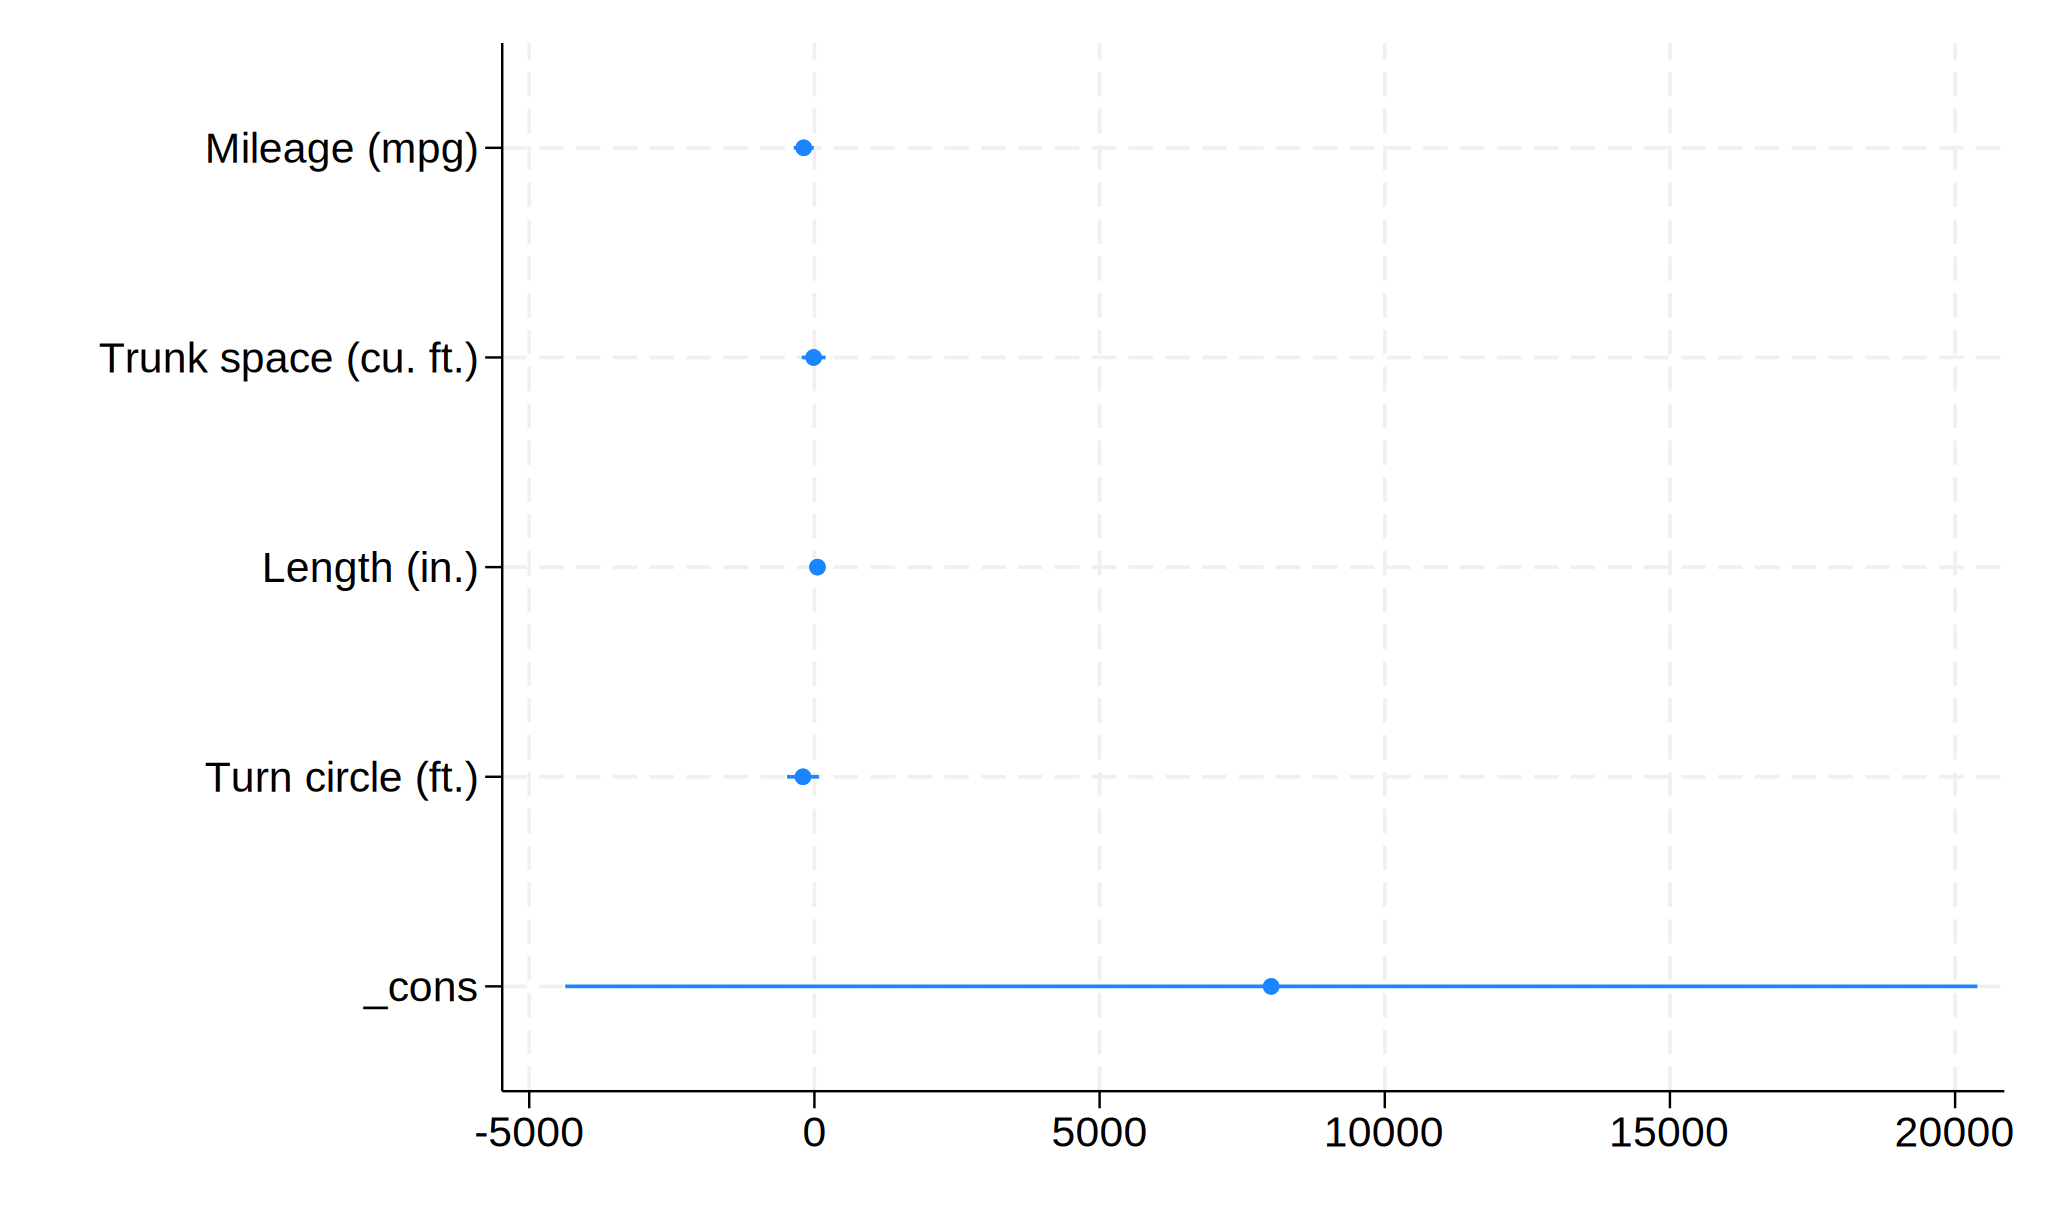

In [12]:
%%stata
coefplot

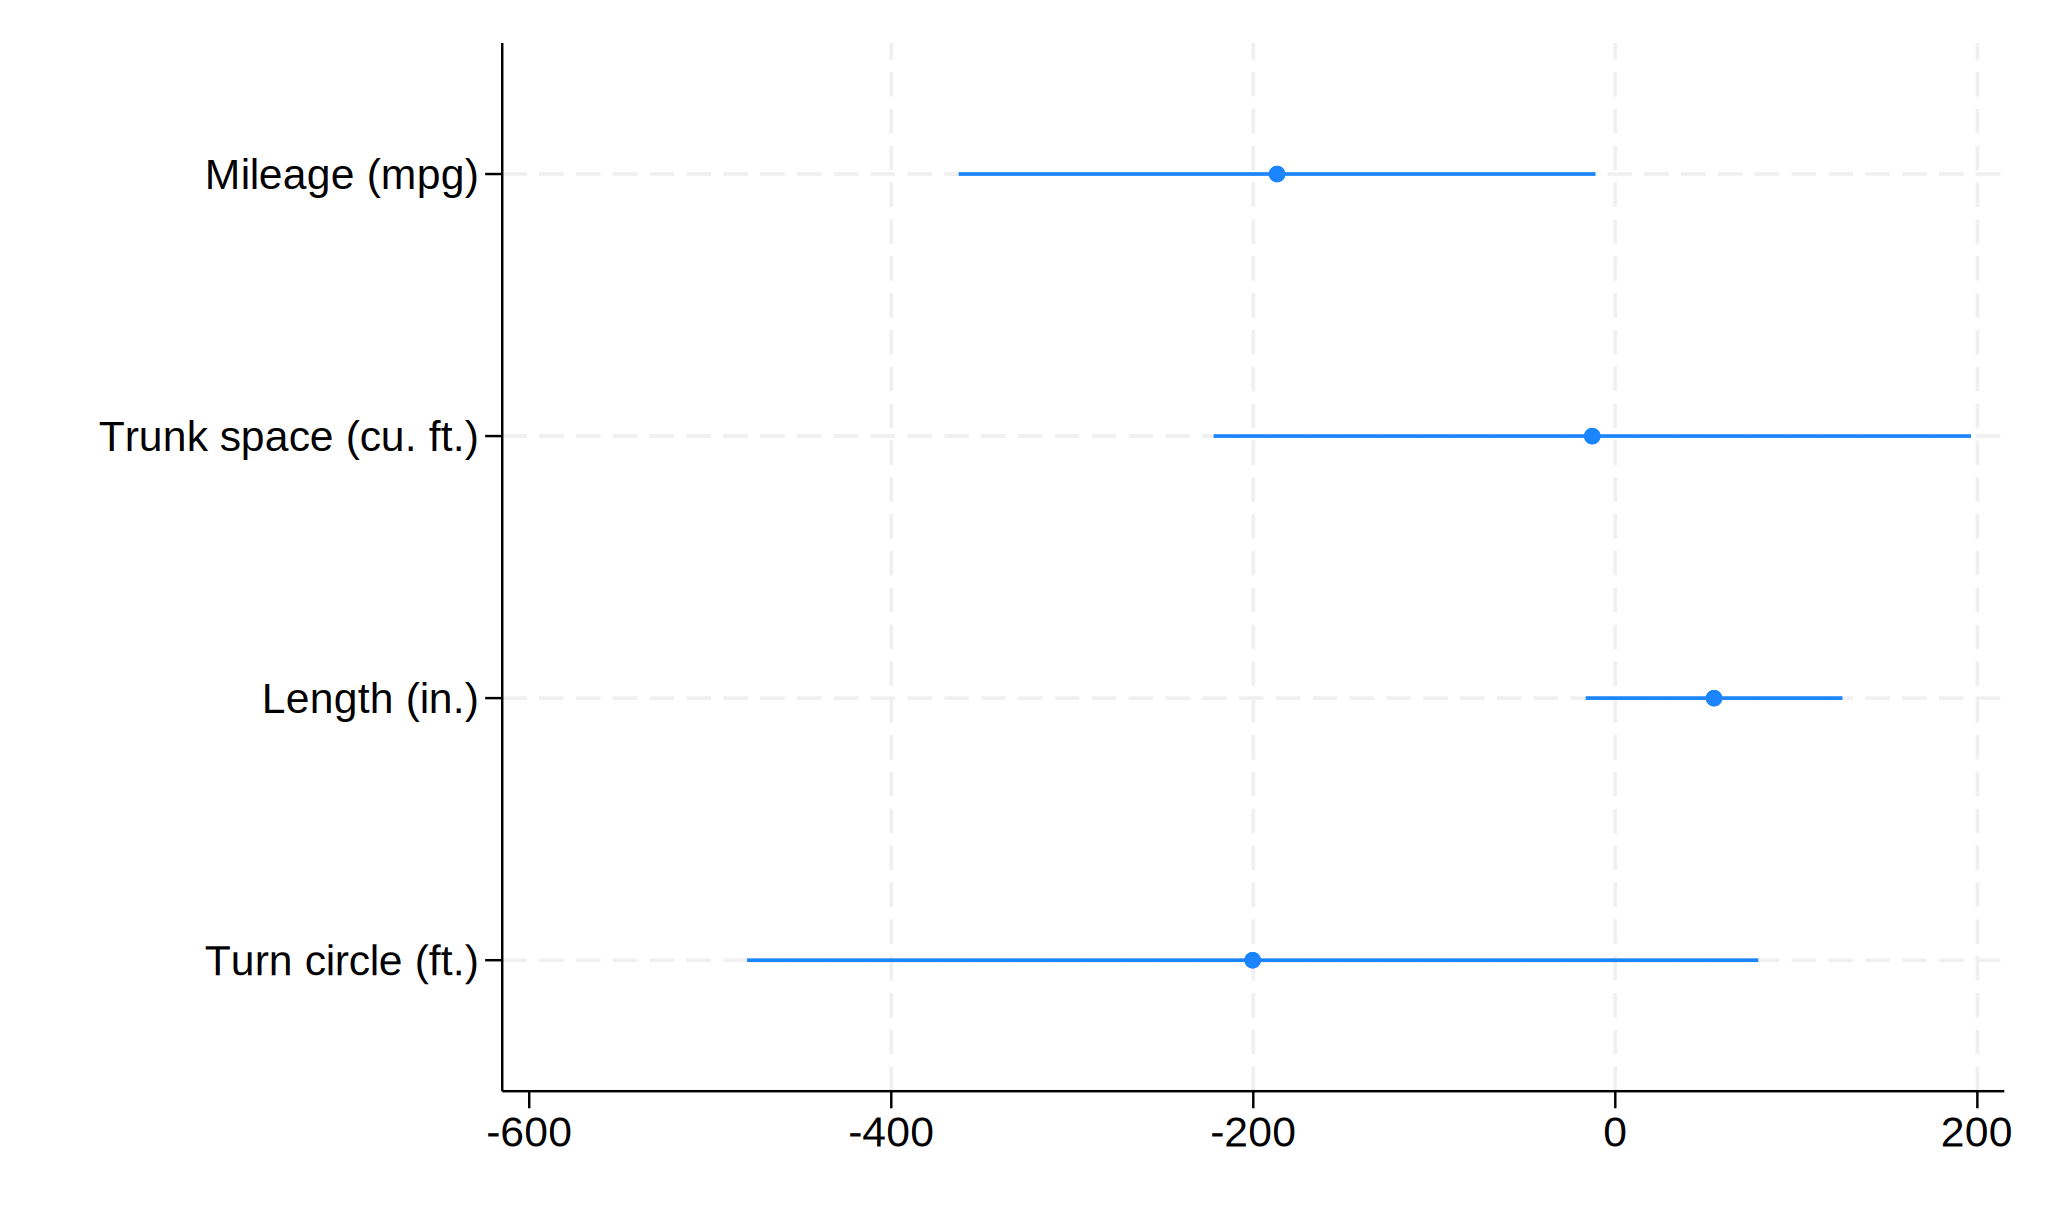

In [13]:
%%stata
coefplot,drop(_cons)

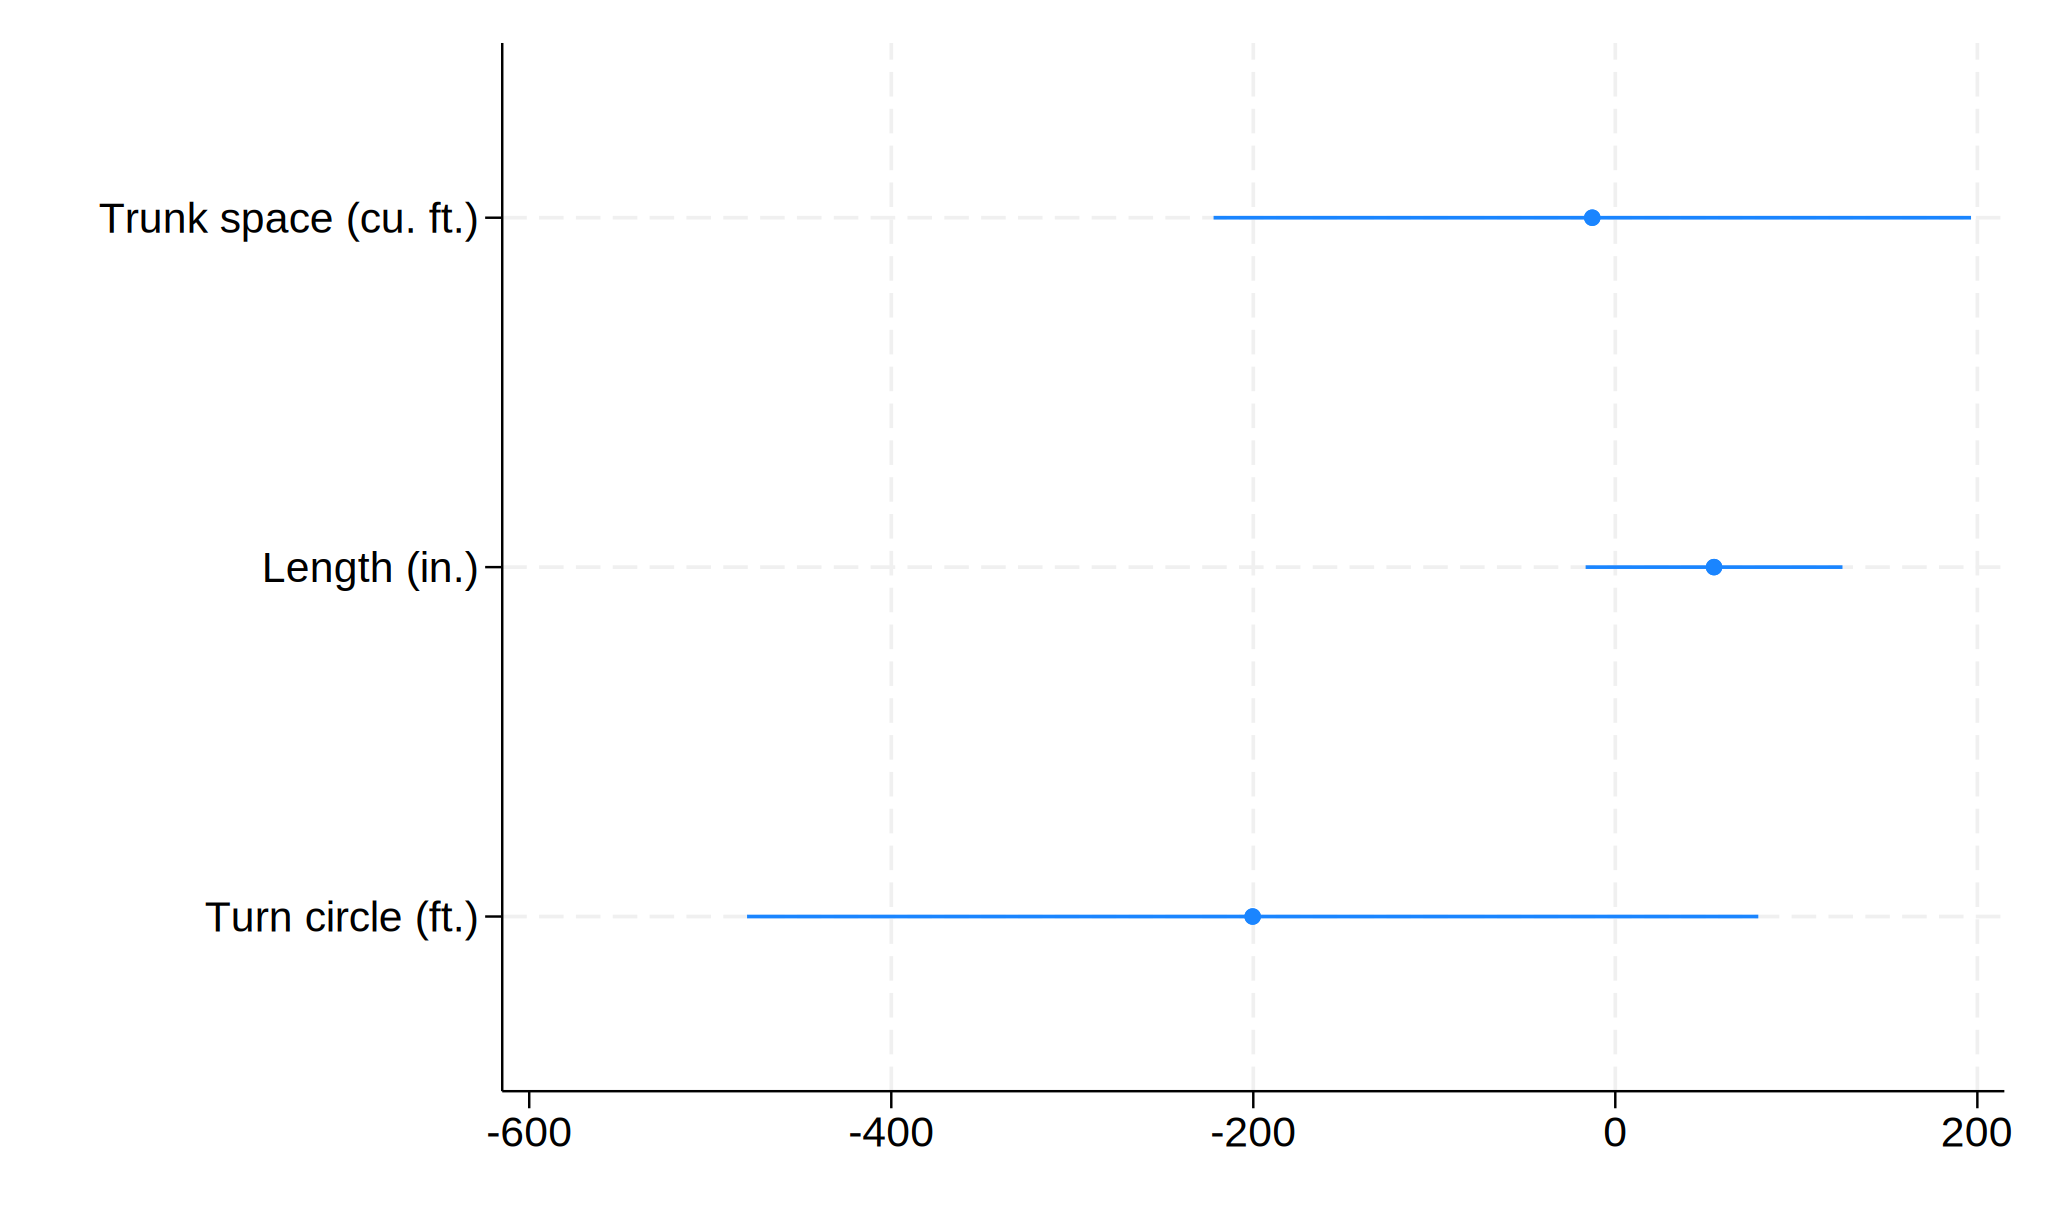

In [14]:
%%stata
coefplot,drop(_cons mpg)

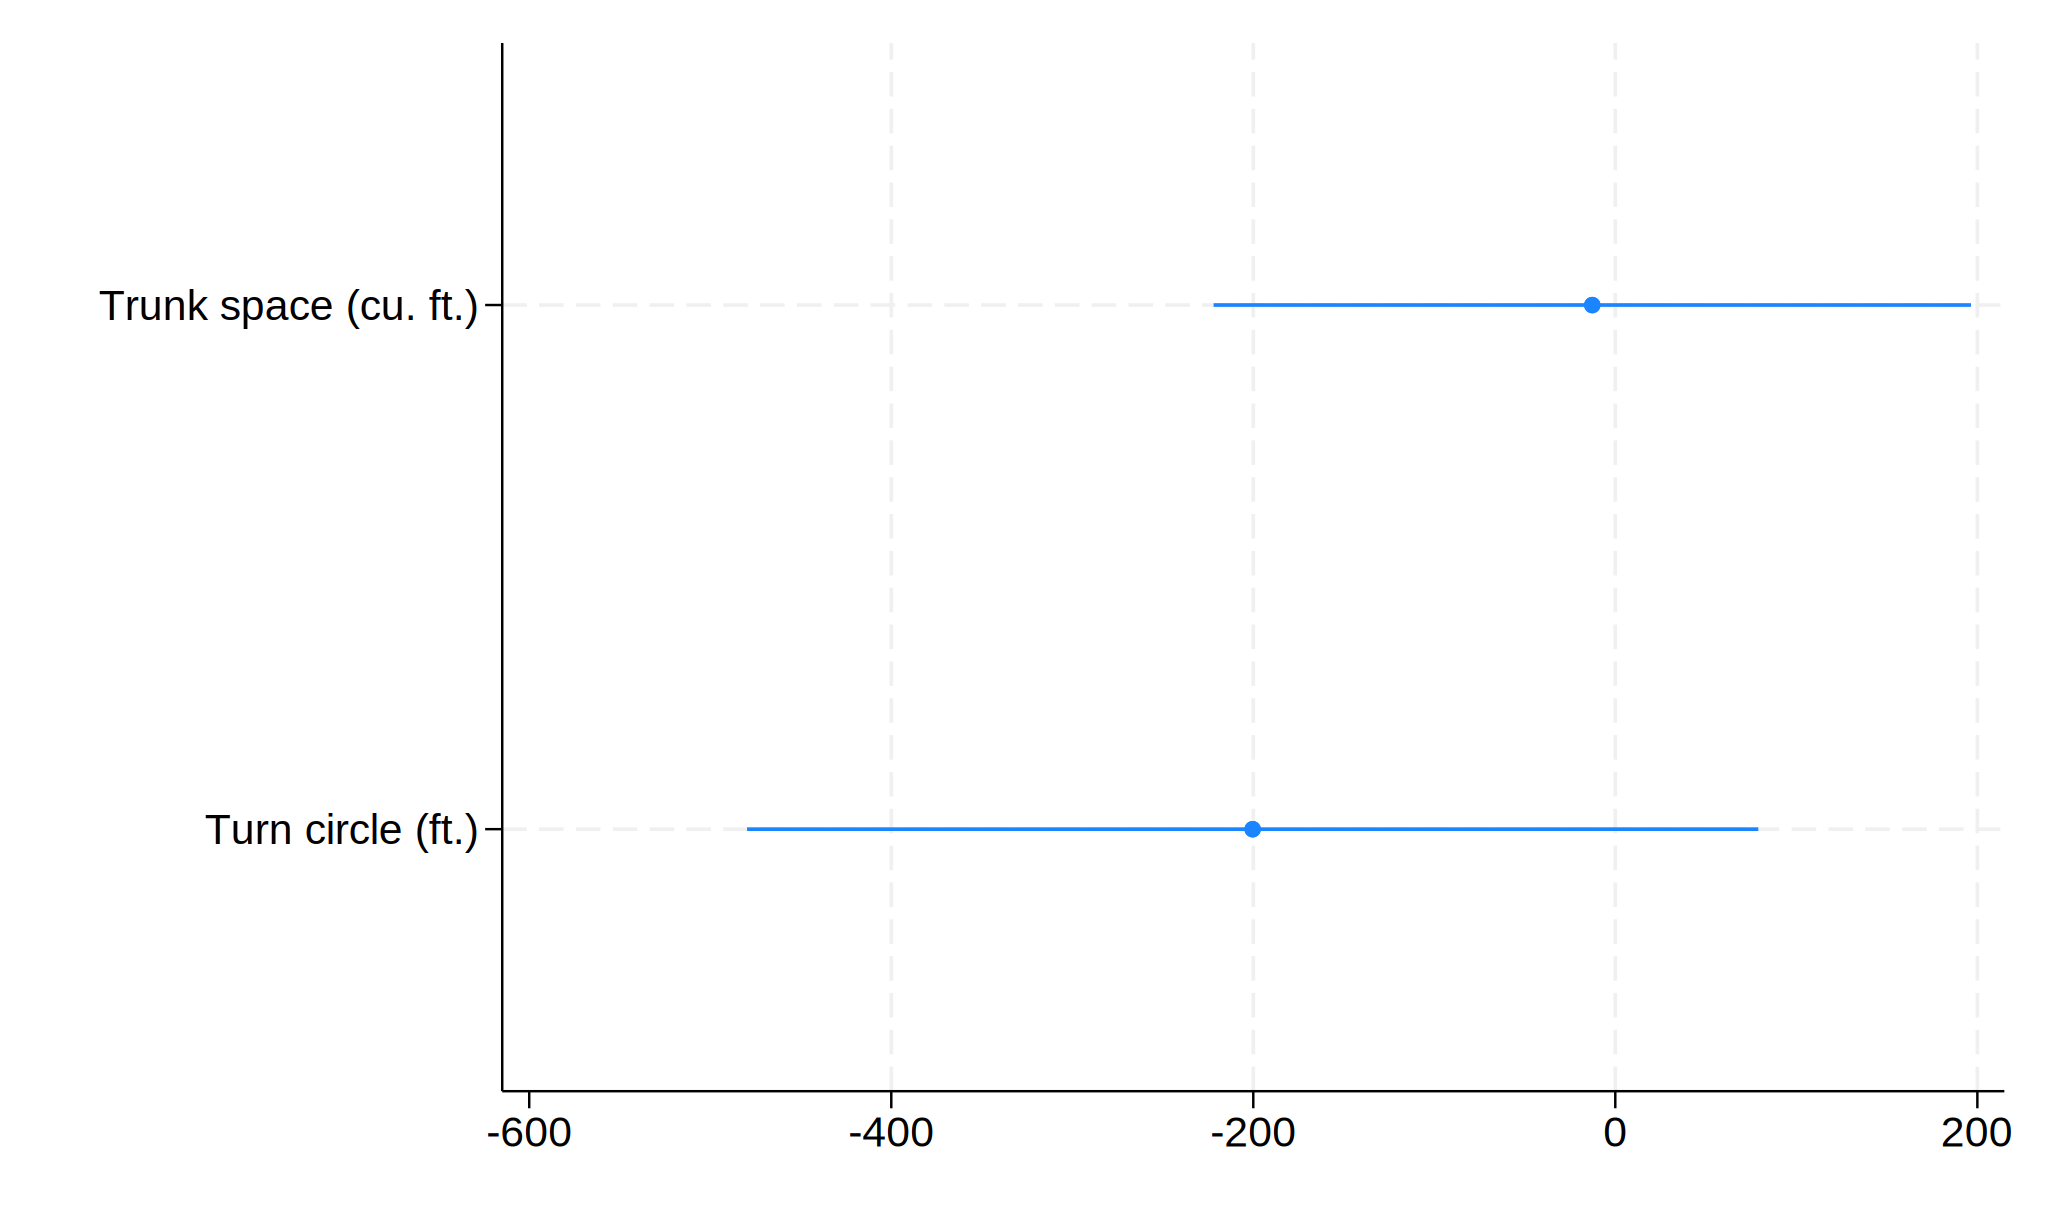

In [15]:
%%stata
coefplot,keep(trunk turn)

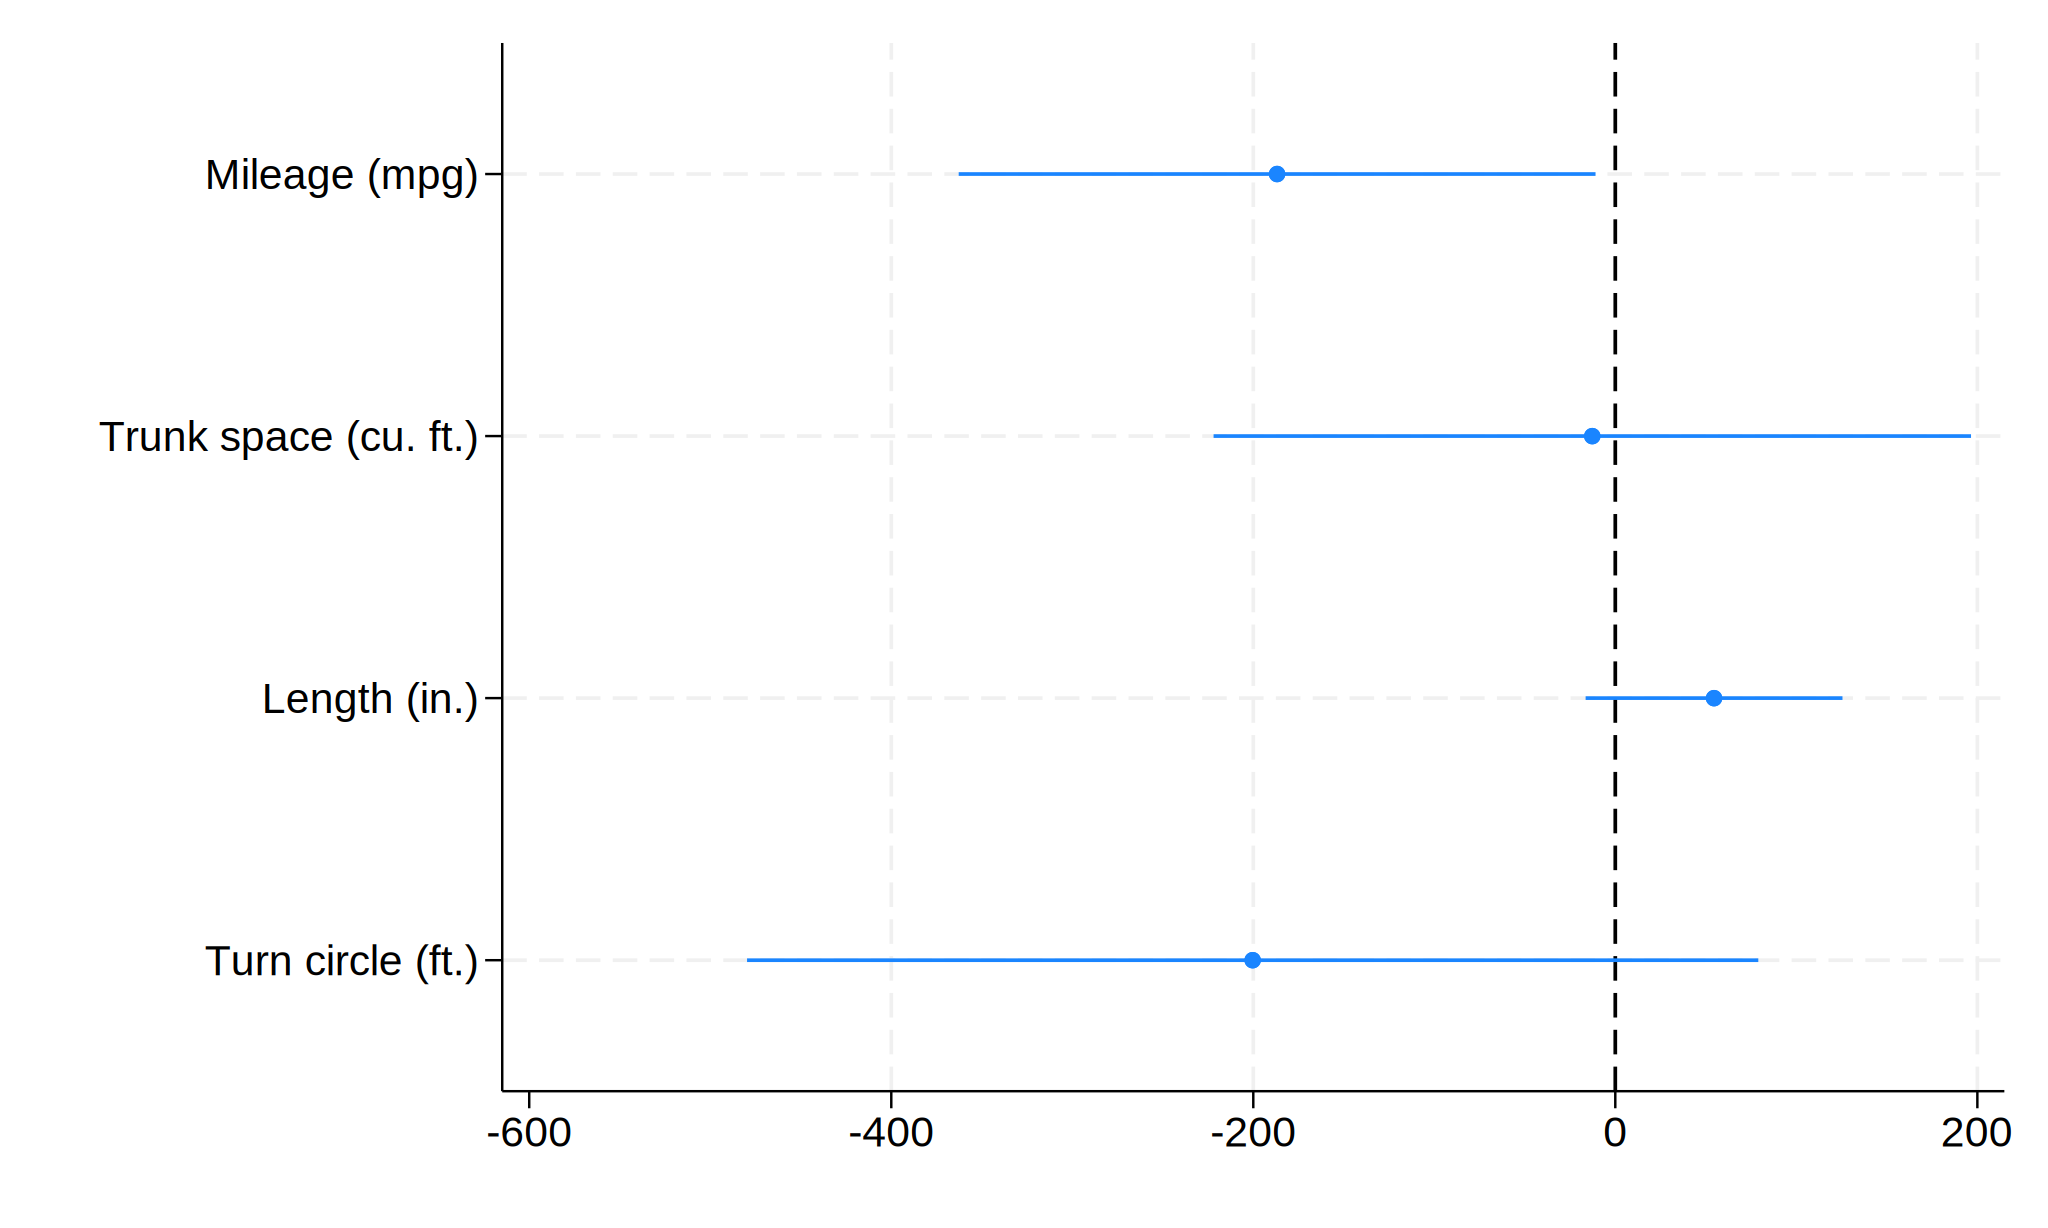

In [16]:
%%stata
coefplot,drop(_cons) xline(0)

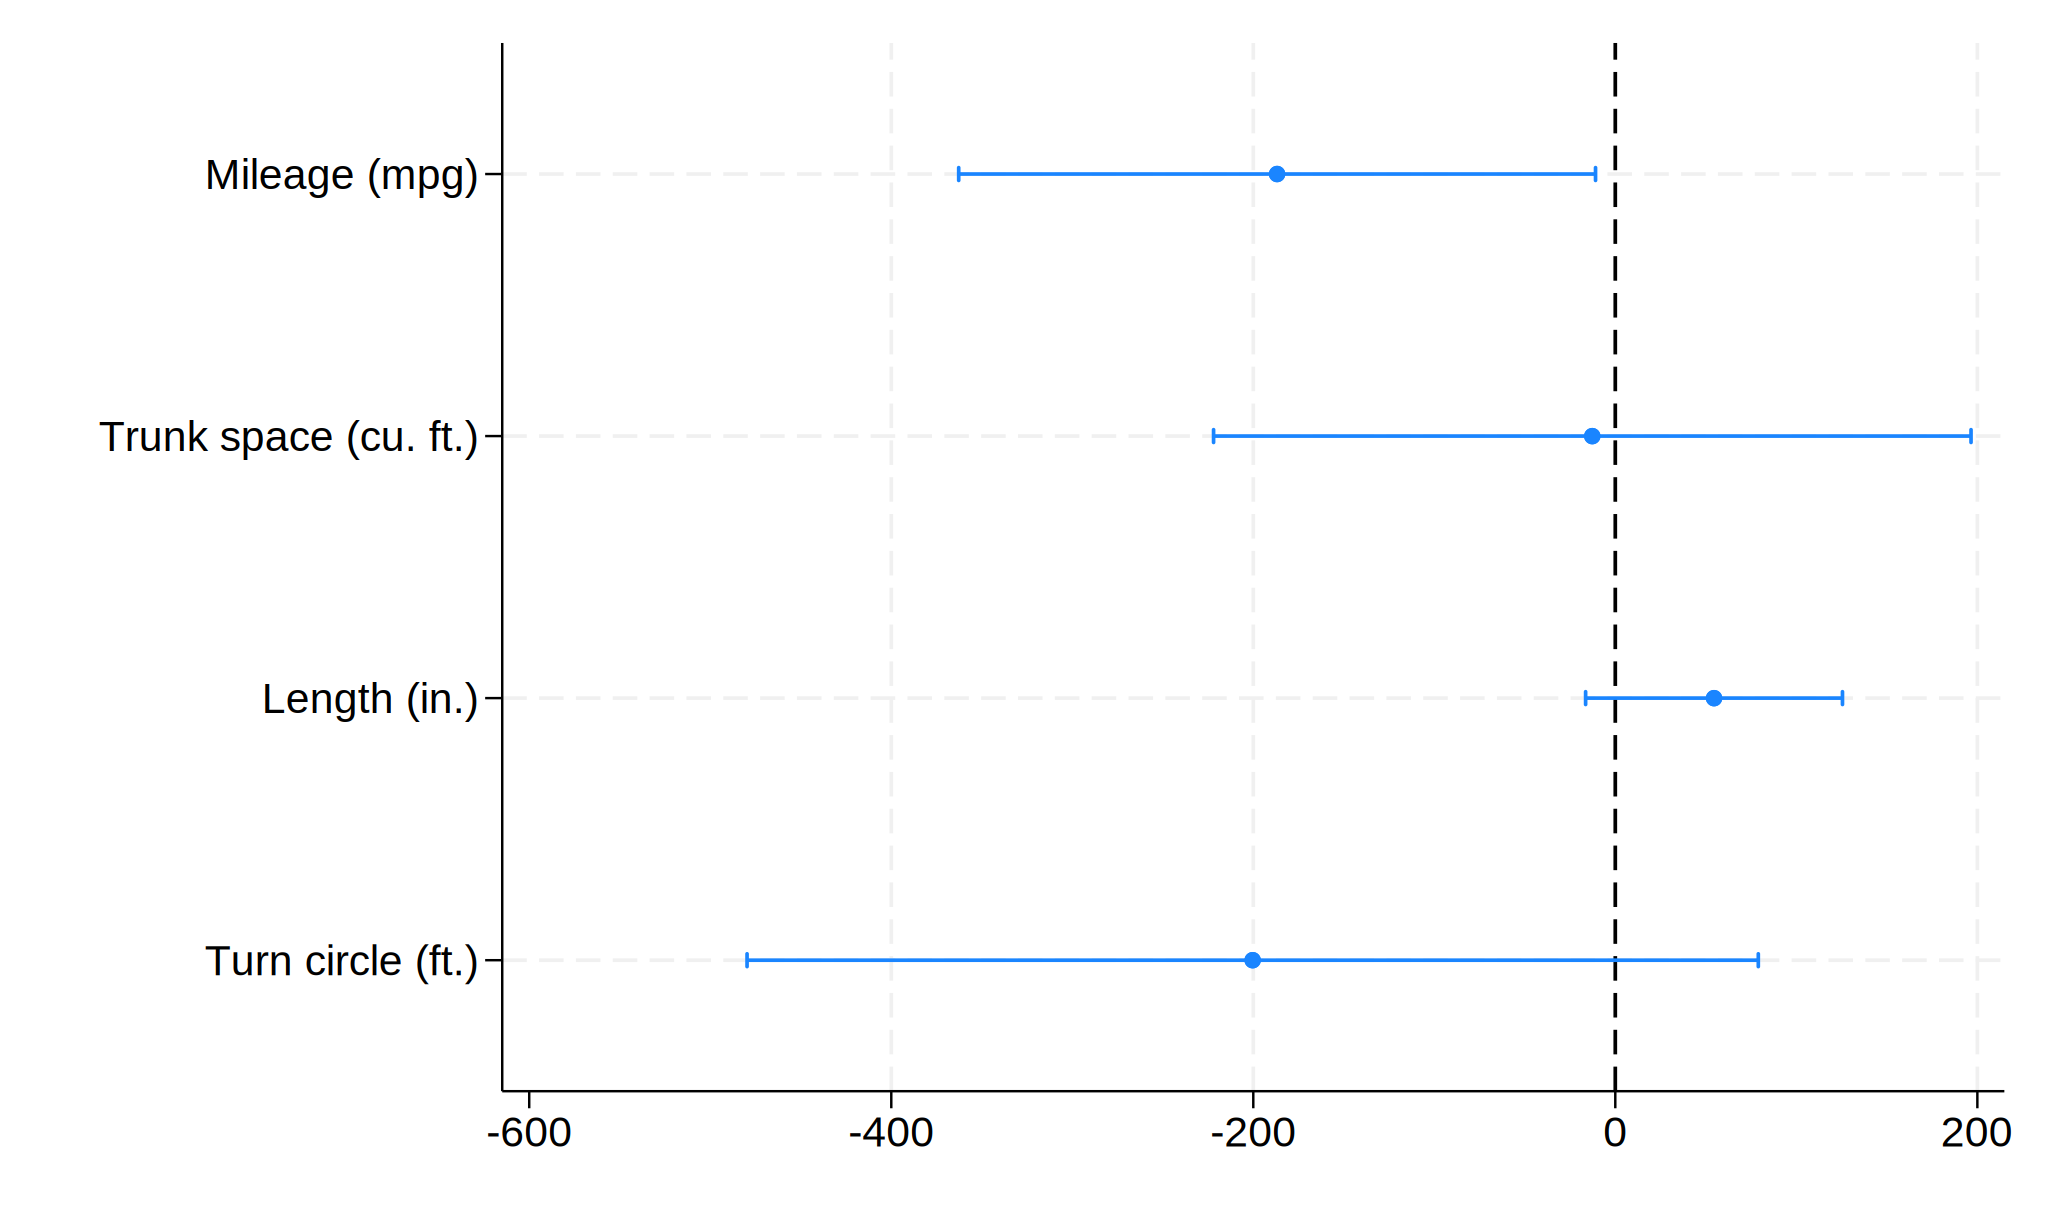

In [17]:
%%stata
coefplot,drop(_cons) xline(0) ciopts(recast(rcap))

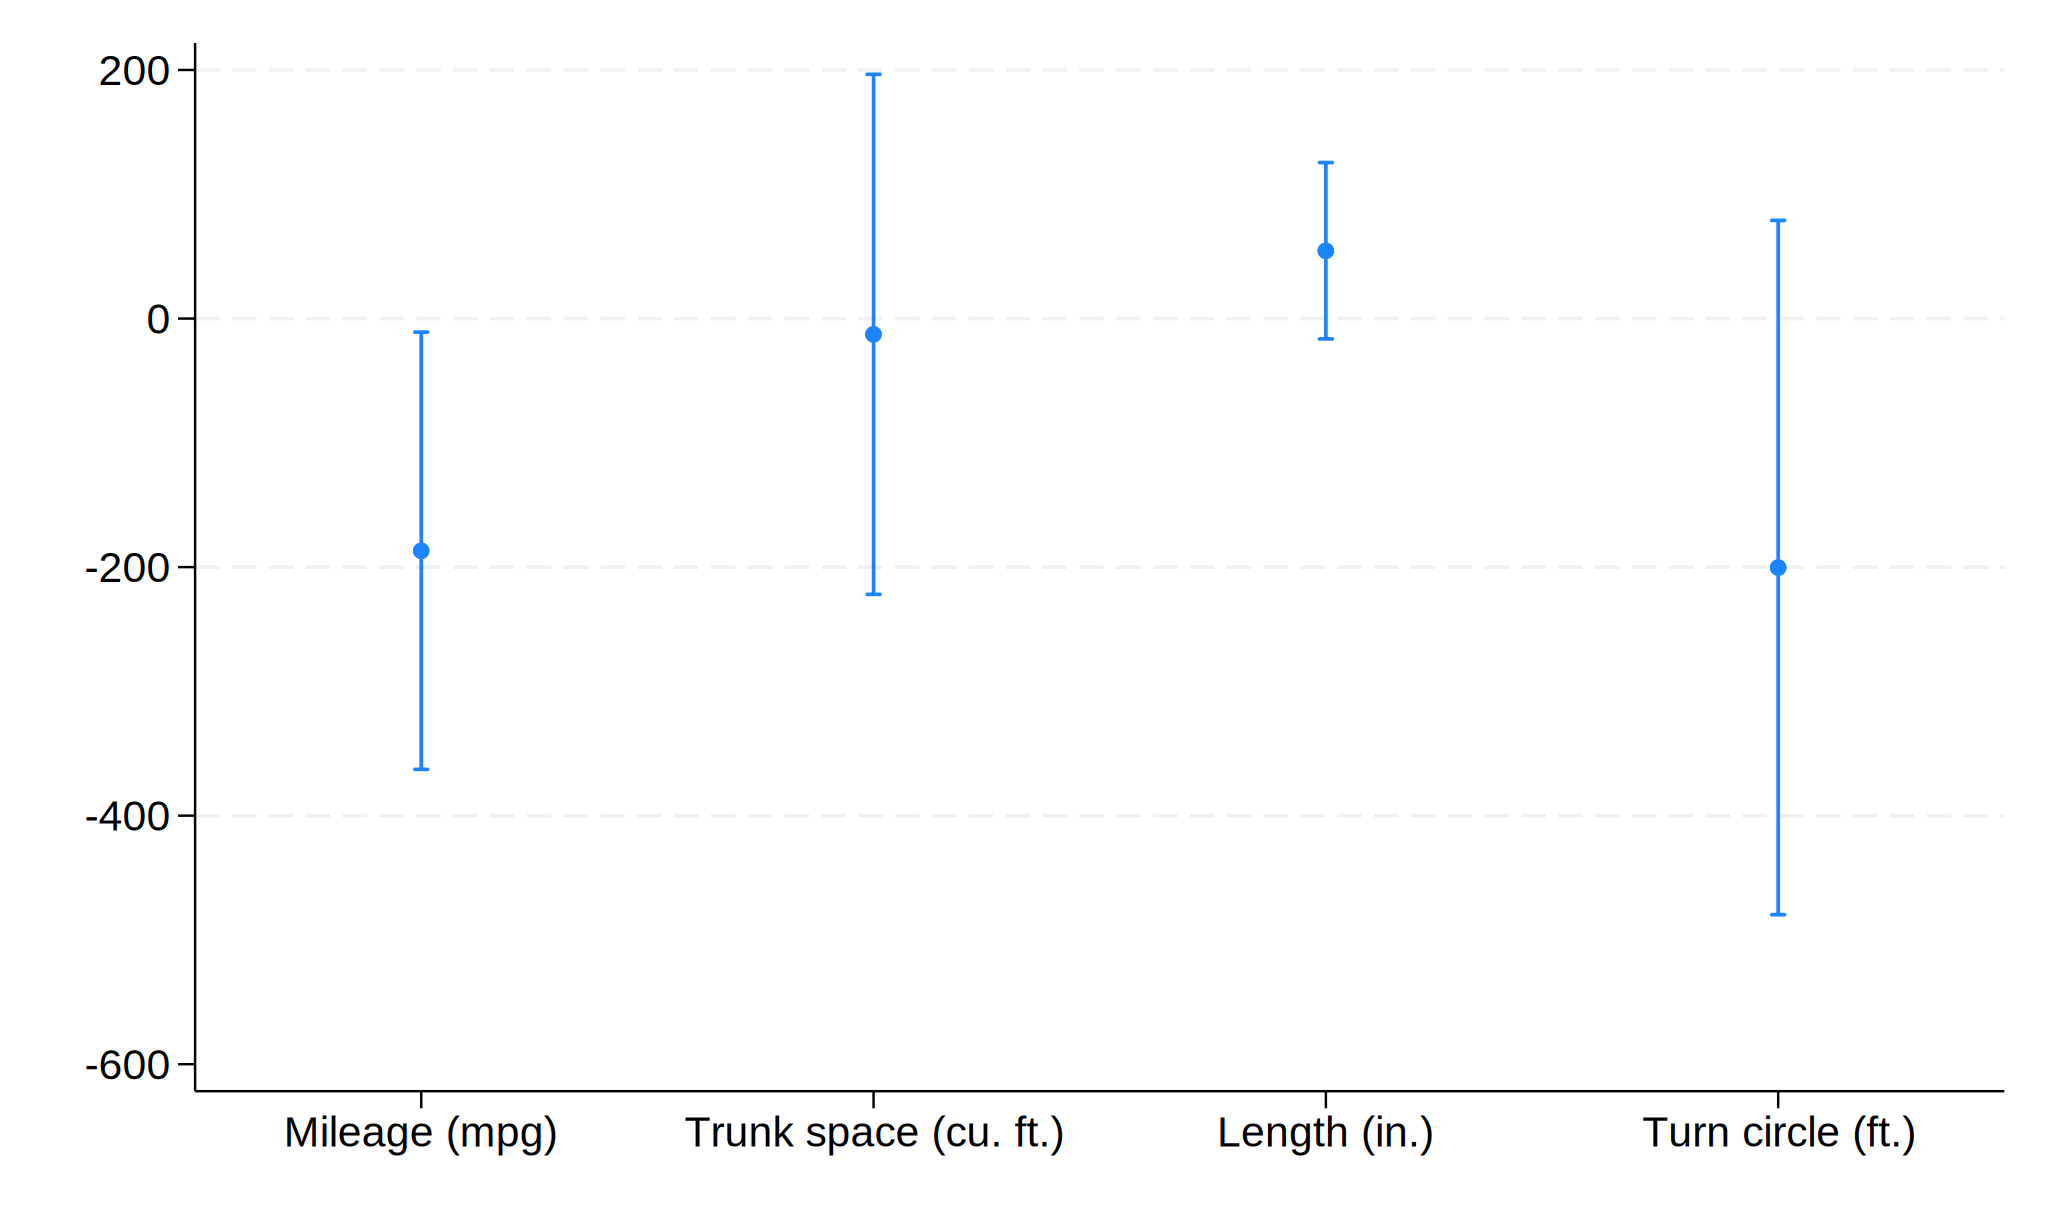

In [ ]:
%%stata
coefplot,drop(_cons) ciopts(recast(rcap)) vertical

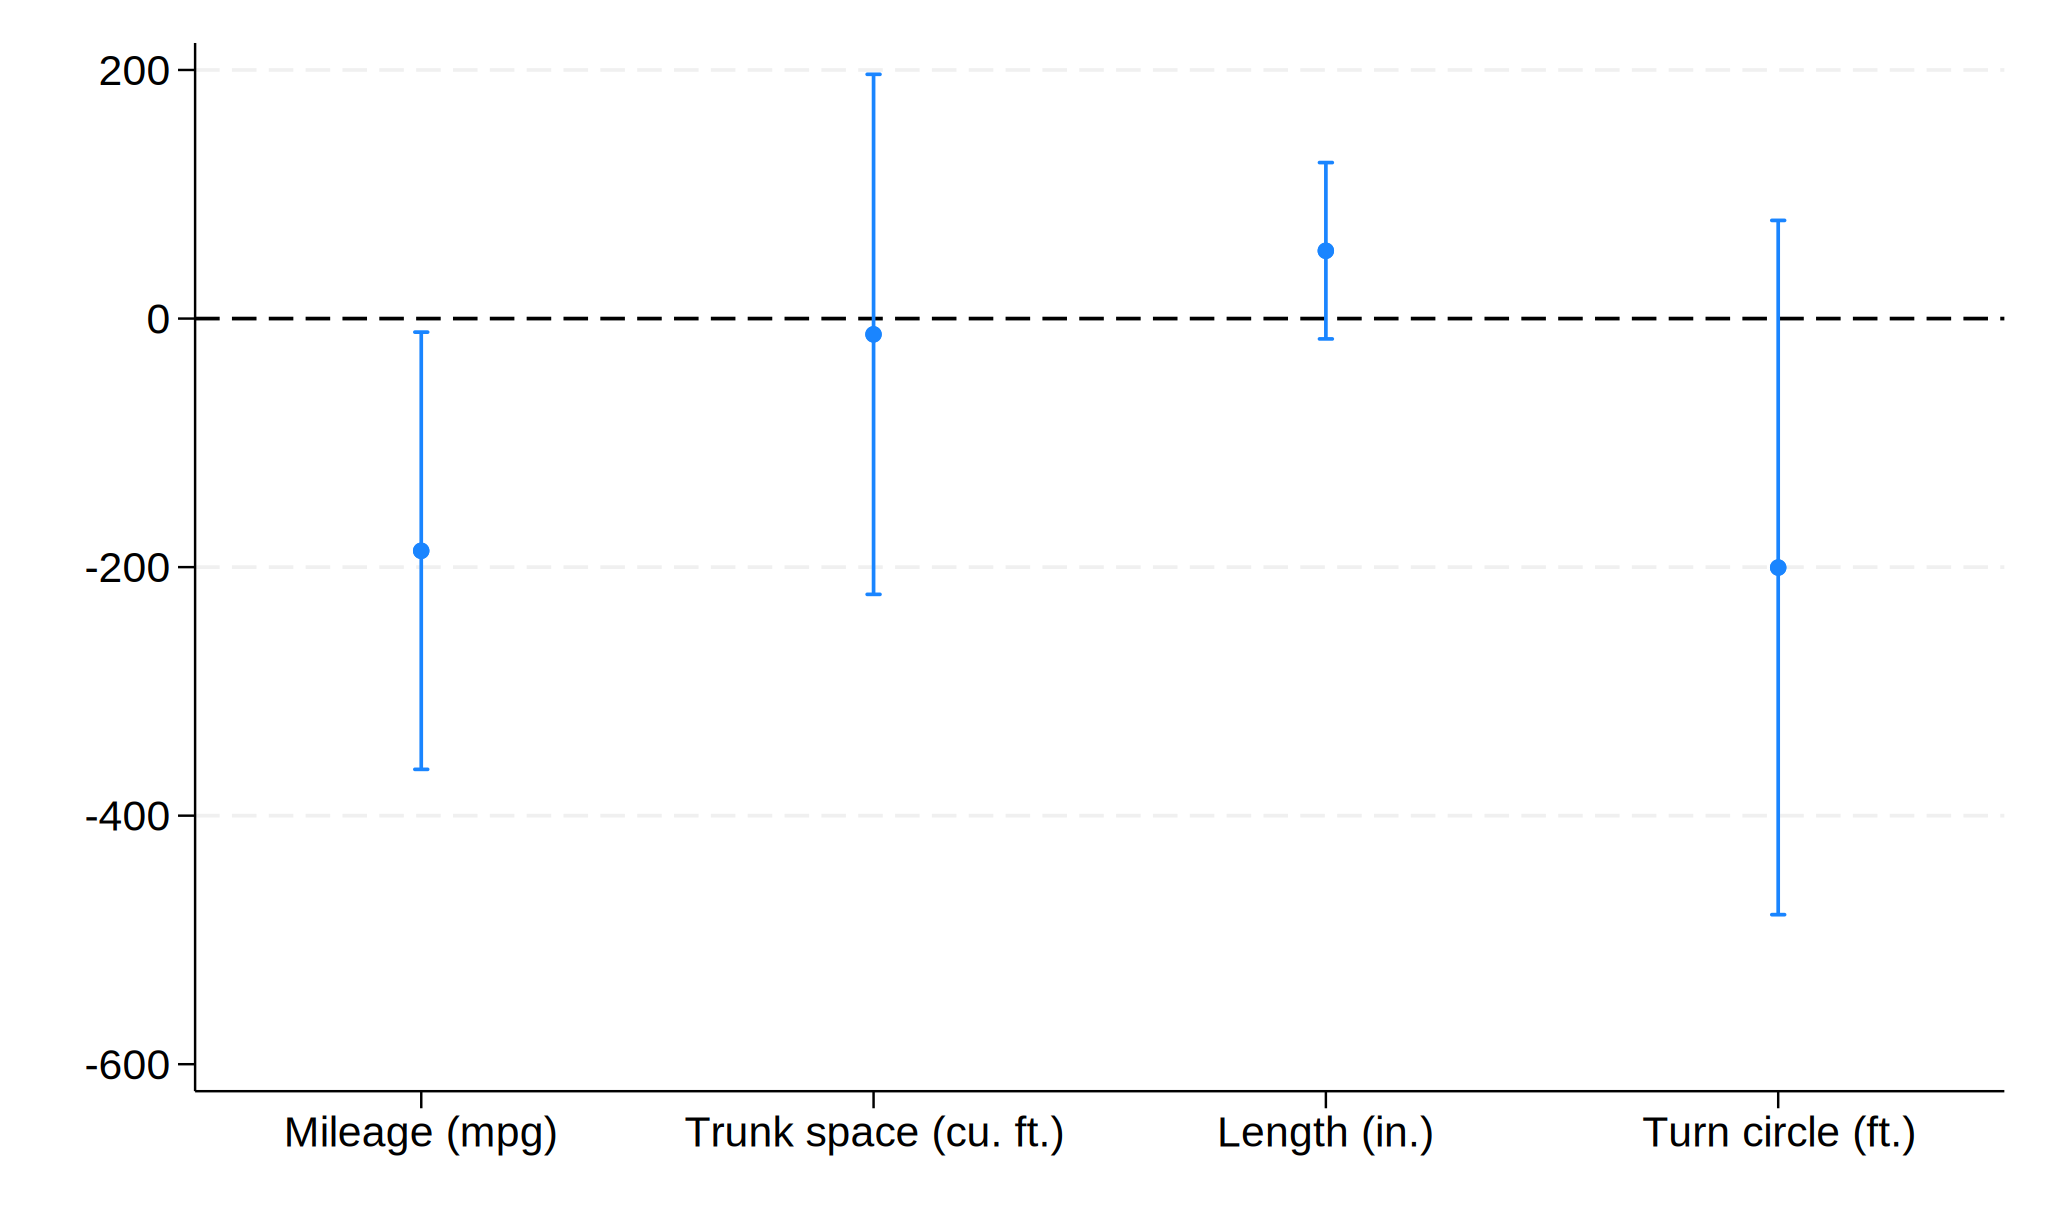

In [19]:
%%stata
coefplot,drop(_cons) yline(0) ciopts(recast(rcap)) vertical

## Logit

这里得到的 coef 都是 log(Odds)

In [20]:
%%stata
logit foreign mpg trunk length turn


Iteration 0:  Log likelihood =  -45.03321  
Iteration 1:  Log likelihood = -27.669278  
Iteration 2:  Log likelihood = -25.257138  
Iteration 3:  Log likelihood = -25.074055  
Iteration 4:  Log likelihood = -25.073487  
Iteration 5:  Log likelihood = -25.073487  

Logistic regression                                     Number of obs =     74
                                                        LR chi2(4)    =  39.92
                                                        Prob > chi2   = 0.0000
Log likelihood = -25.073487                             Pseudo R2     = 0.4432

------------------------------------------------------------------------------
     foreign | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         mpg |  -.1229744   .0824787    -1.49   0.136    -.2846296    .0386808
       trunk |  -.0029202   .1167932    -0.03   0.980    -.2318307    .2259904
      length |  -.0438

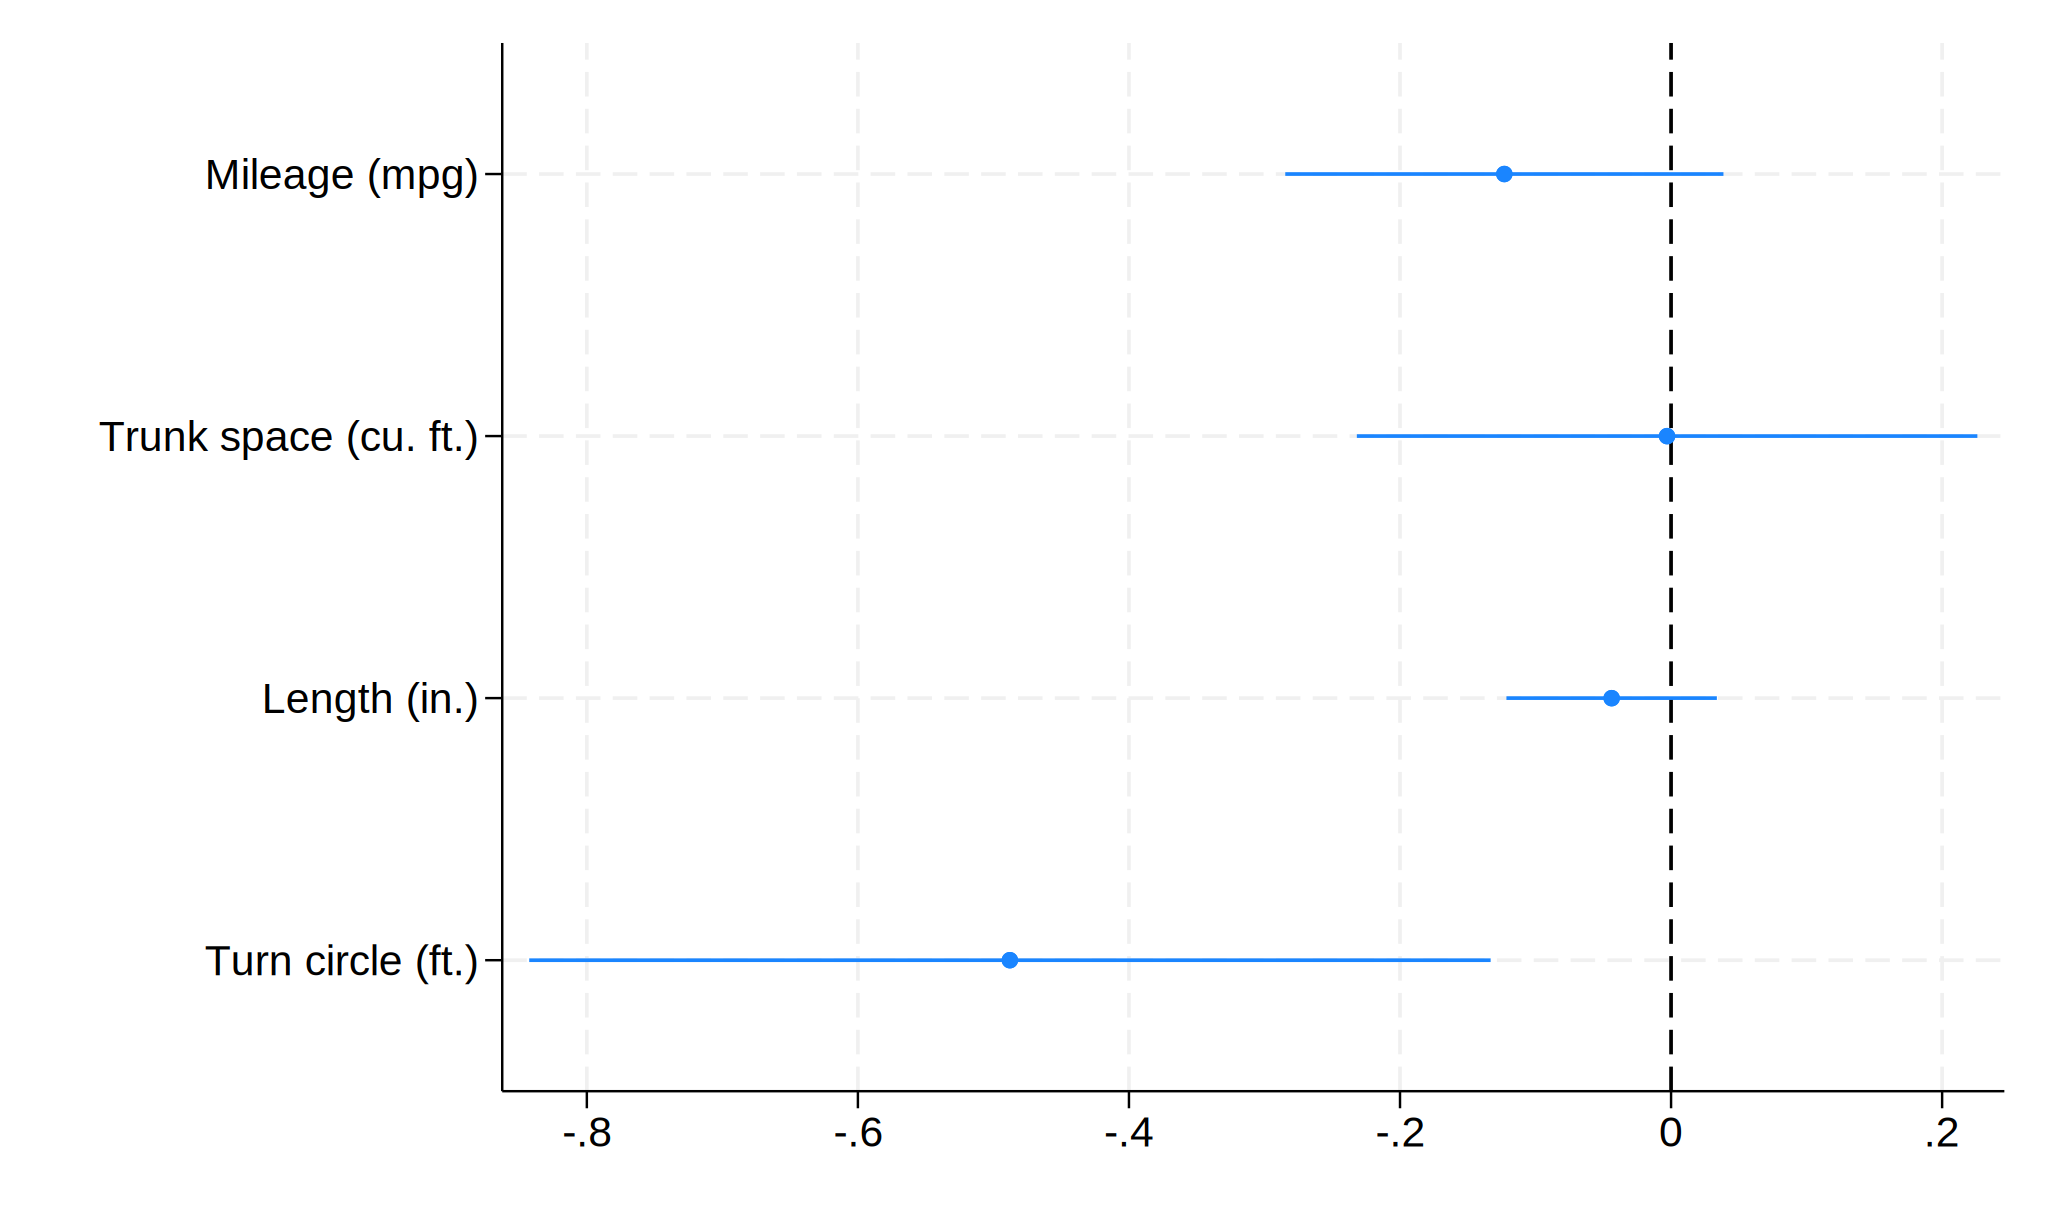

In [21]:
%%stata
coefplot,drop(_cons) xline(0)

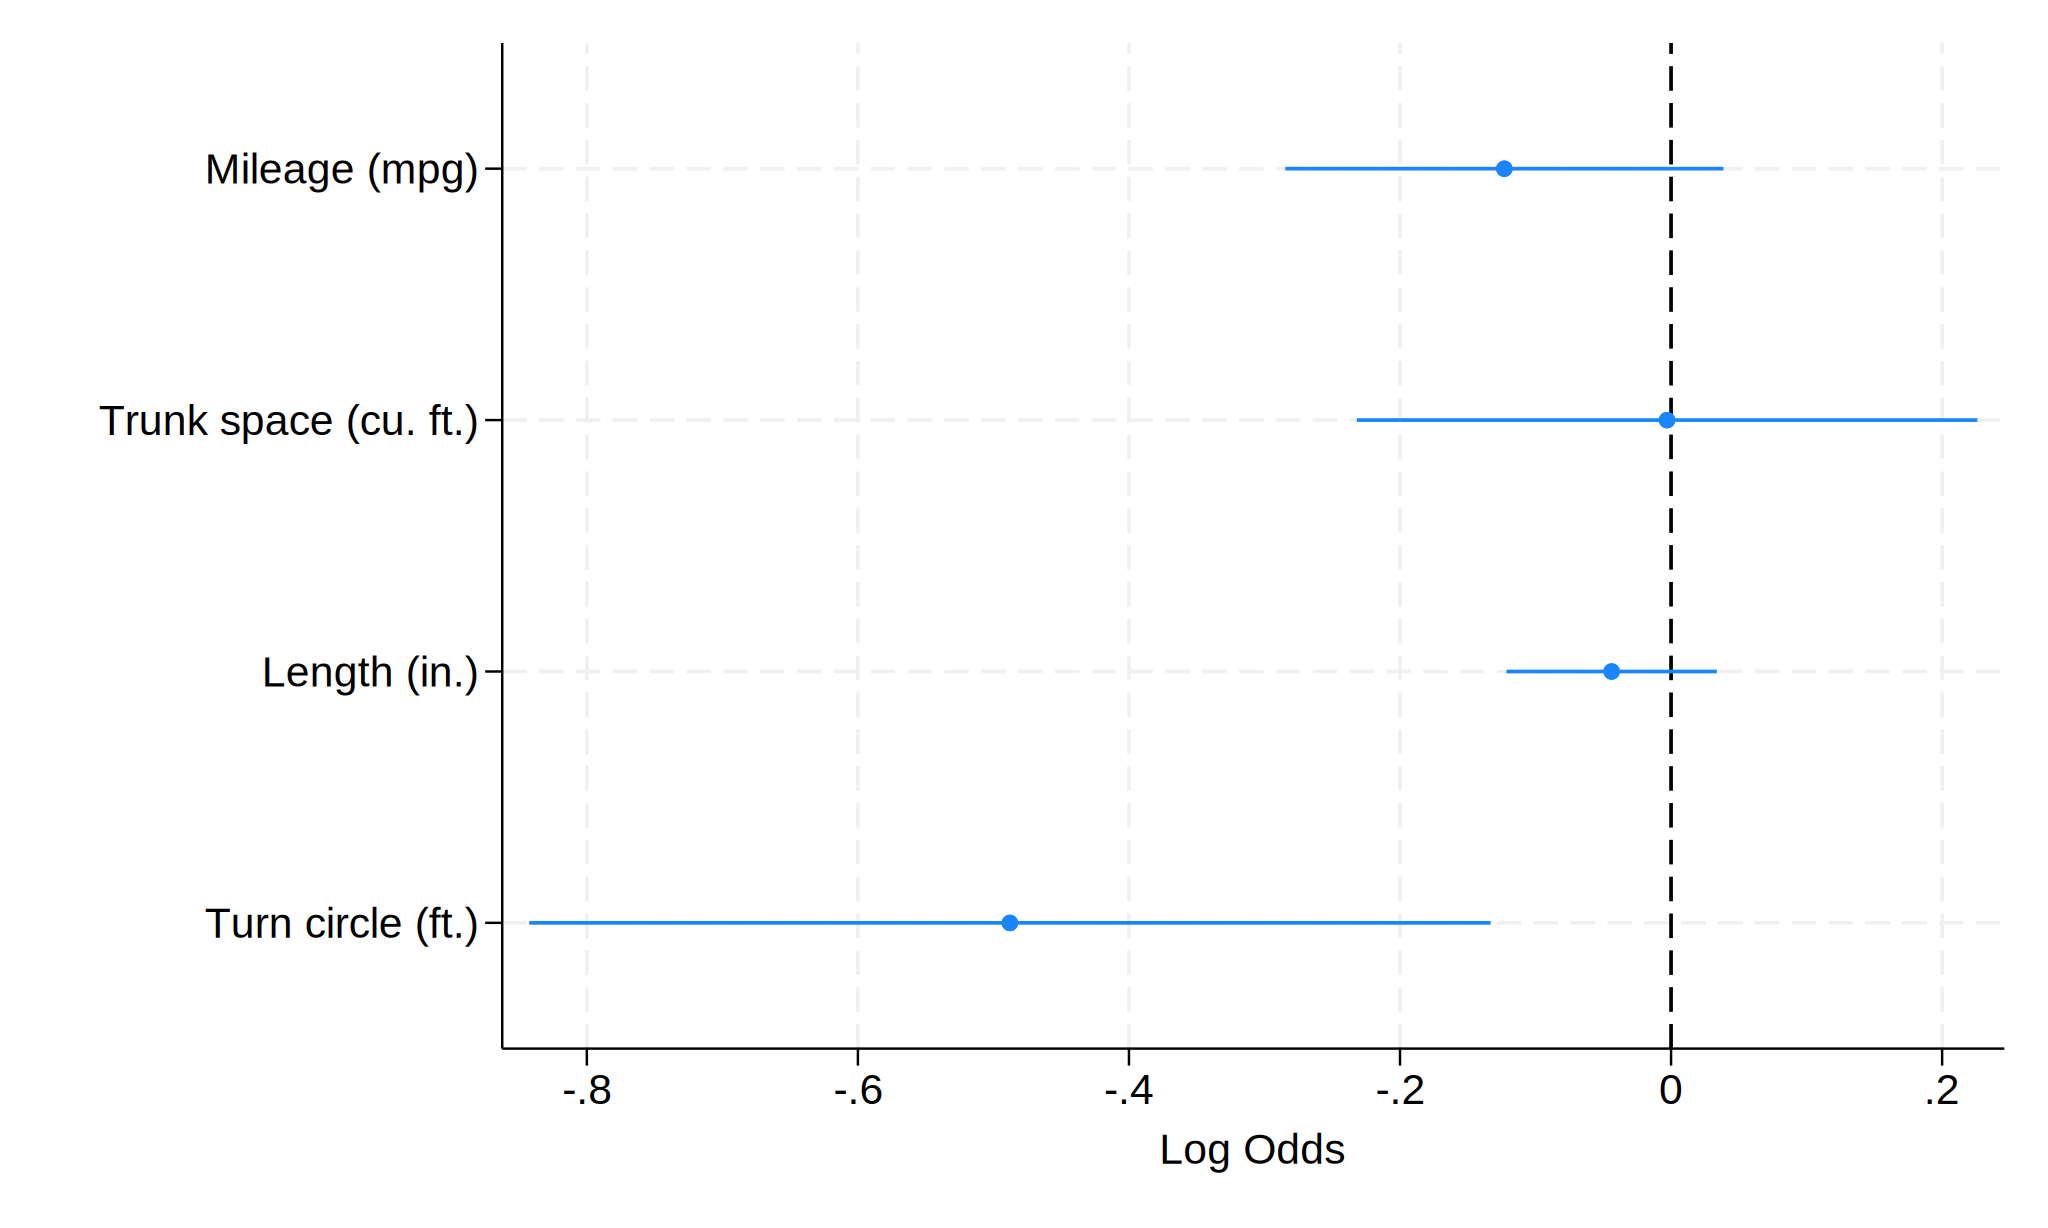

In [22]:
%%stata
coefplot,drop(_cons) xline(0) xtitle("Log Odds")

### subgroup


. reg price mpg trunk length turn if foreign == 0

      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(4, 47)        =      4.46
       Model |   134498637         4  33624659.2   Prob > F        =    0.0039
    Residual |   354696164        47  7546726.89   R-squared       =    0.2749
-------------+----------------------------------   Adj R-squared   =    0.2132
       Total |   489194801        51  9592054.92   Root MSE        =    2747.1

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         mpg |  -186.1083    161.561    -1.15   0.255    -511.1271    138.9104
       trunk |  -60.83919   153.2709    -0.40   0.693    -369.1805    247.5021
      length |   52.68785   53.74091     0.98   0.332    -55.42491    160.8006

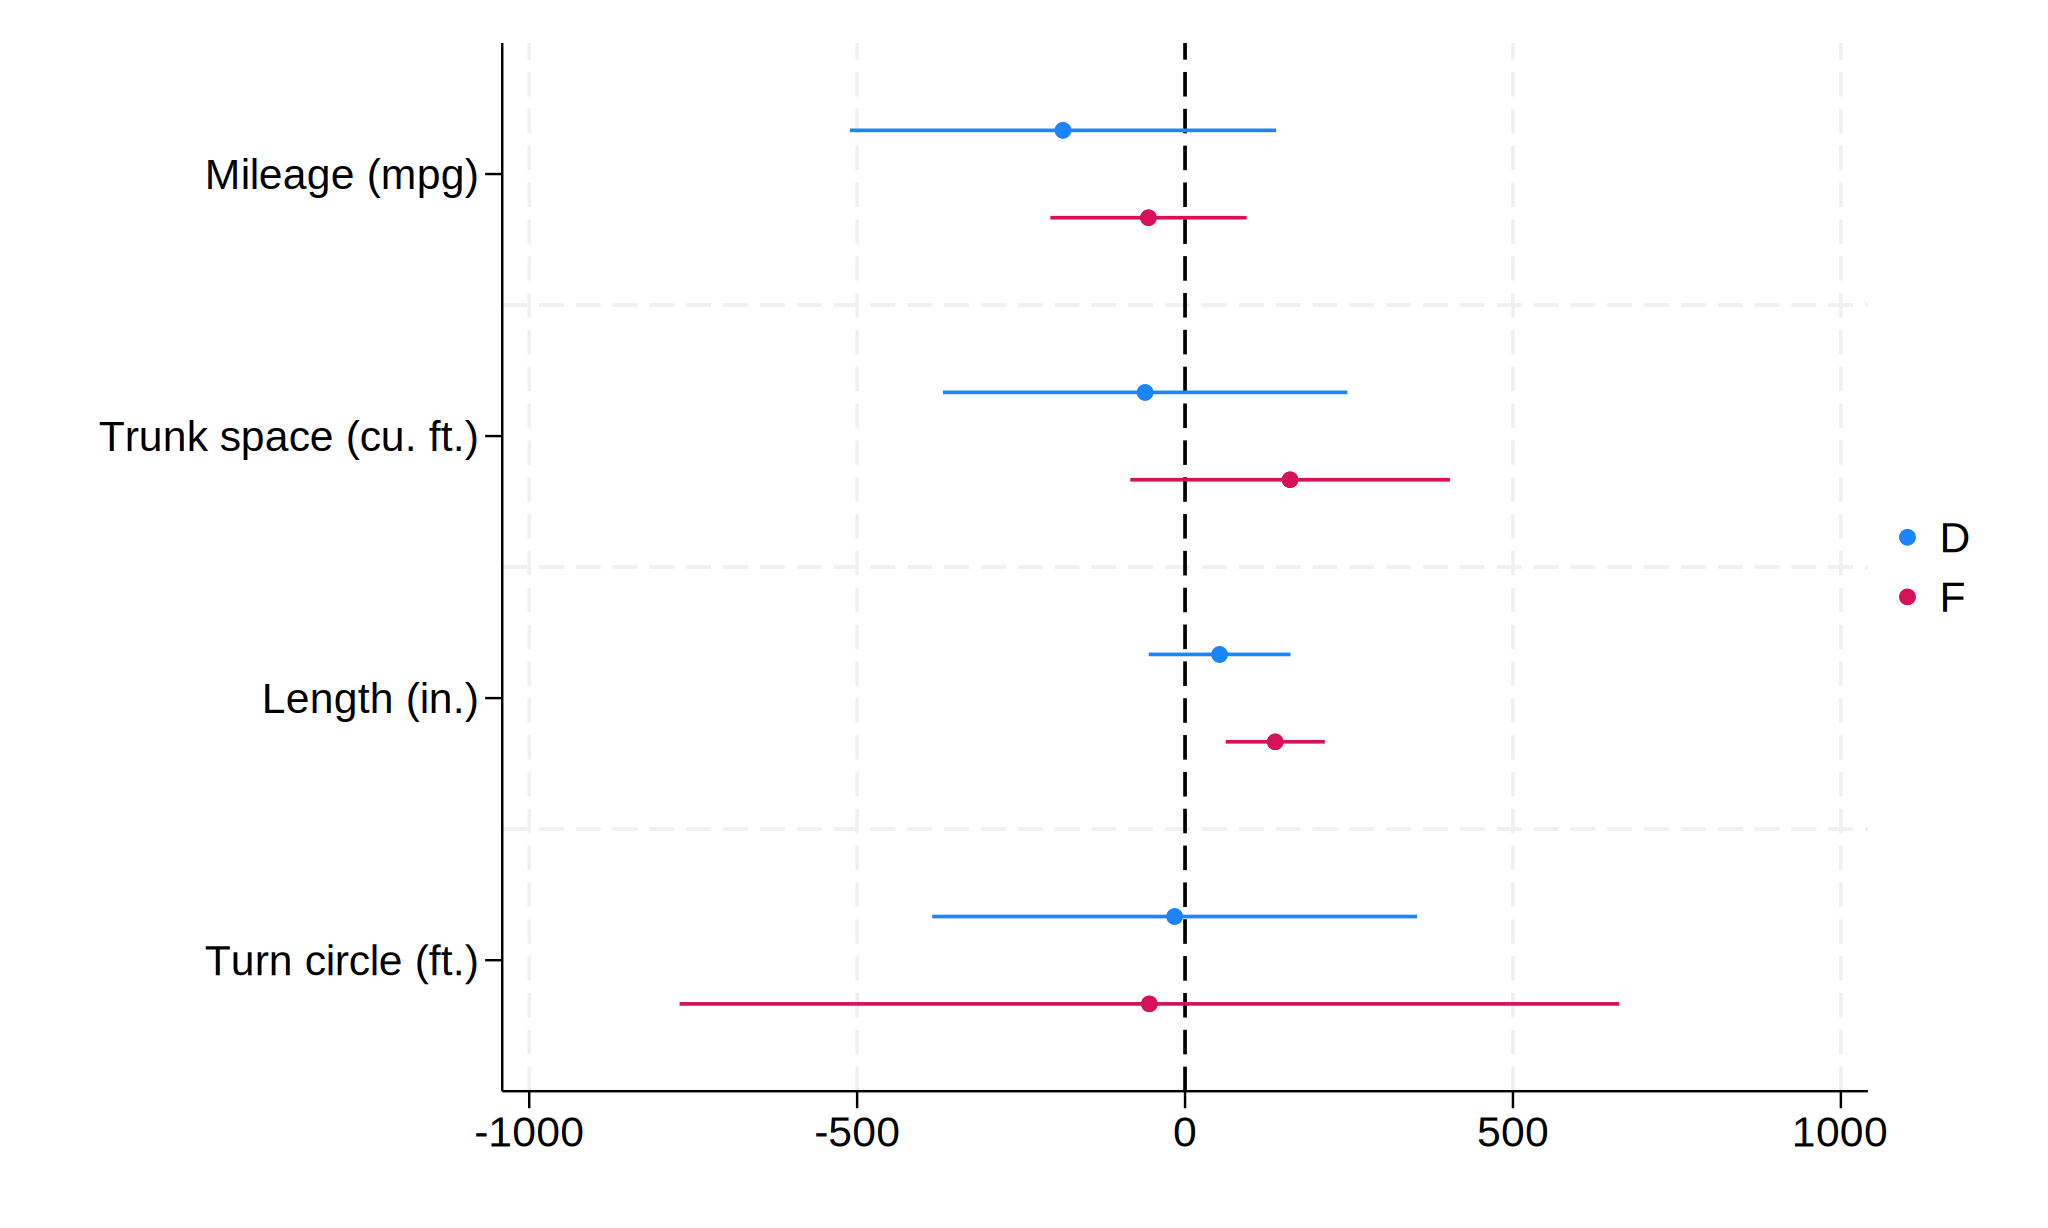

In [23]:
%%stata
reg price mpg trunk length turn if foreign == 0
est store D
reg price mpg trunk length turn if foreign == 1
est store F

coefplot D F,drop(_cons) xline(0)


. coefplot (D, label("Domestic")) (F, label("Foreign")), ///
> drop(_cons) xline(0)

. 


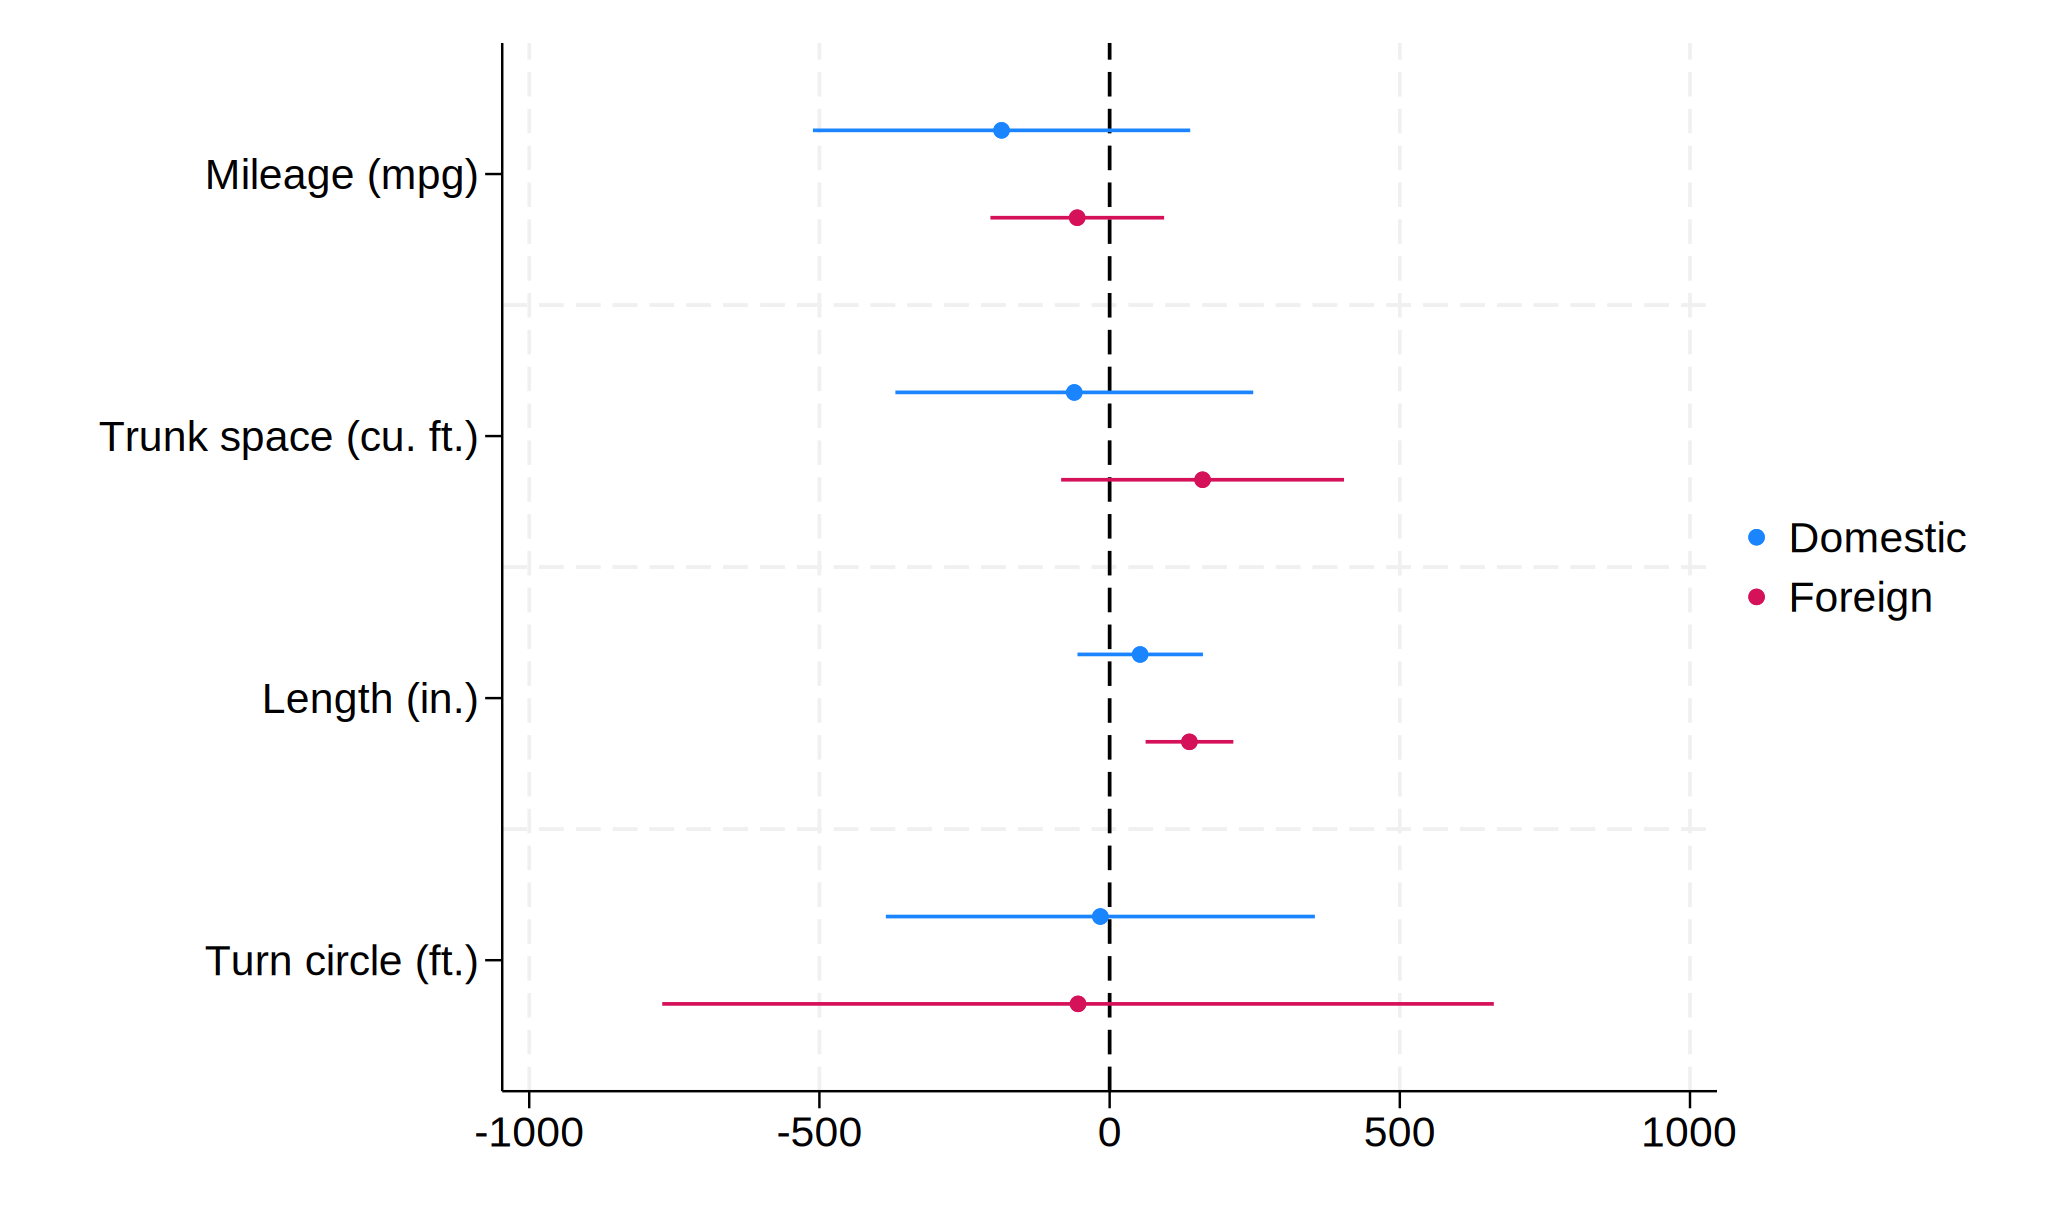

In [24]:
%%stata
coefplot (D, label("Domestic")) (F, label("Foreign")), ///
drop(_cons) xline(0)


. coefplot (D, label("Domestic")) (F, label("Foreign")), ///
> drop(_cons) xline(0) ciopts(recast(rcap)) msymbol(S)

. 


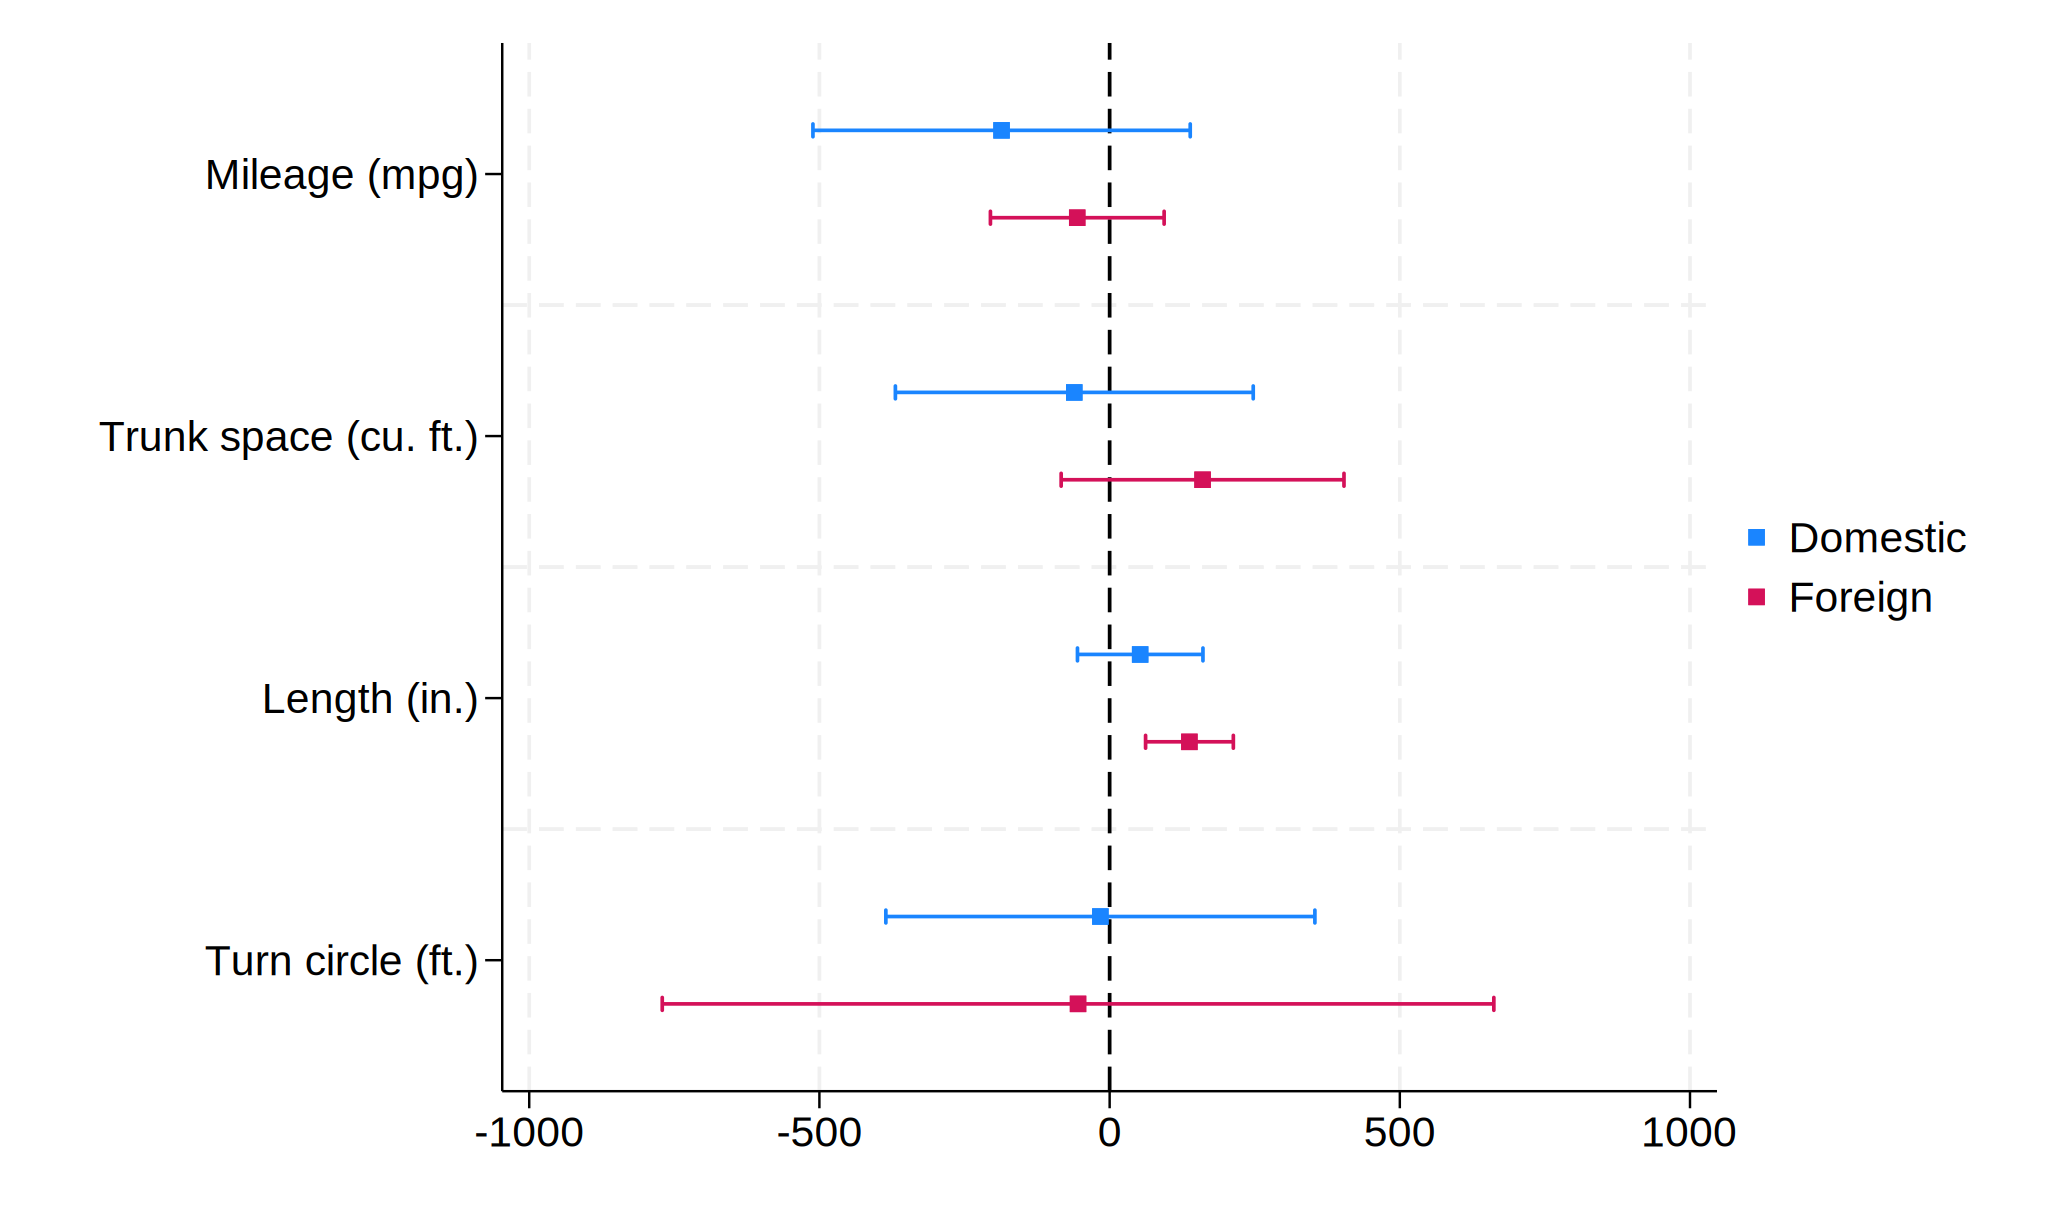

In [25]:
%%stata
coefplot (D, label("Domestic")) (F, label("Foreign")), ///
drop(_cons) xline(0) ciopts(recast(rcap)) msymbol(S)


. coefplot (D, label("Domestic") msymbol(S)) ///
> (F, label("Foreign") msymbol(C)), ///
> drop(_cons) xline(0) ciopts(recast(rcap)) 
(note:  named style C not found in class symbol, default attributes used)

. 


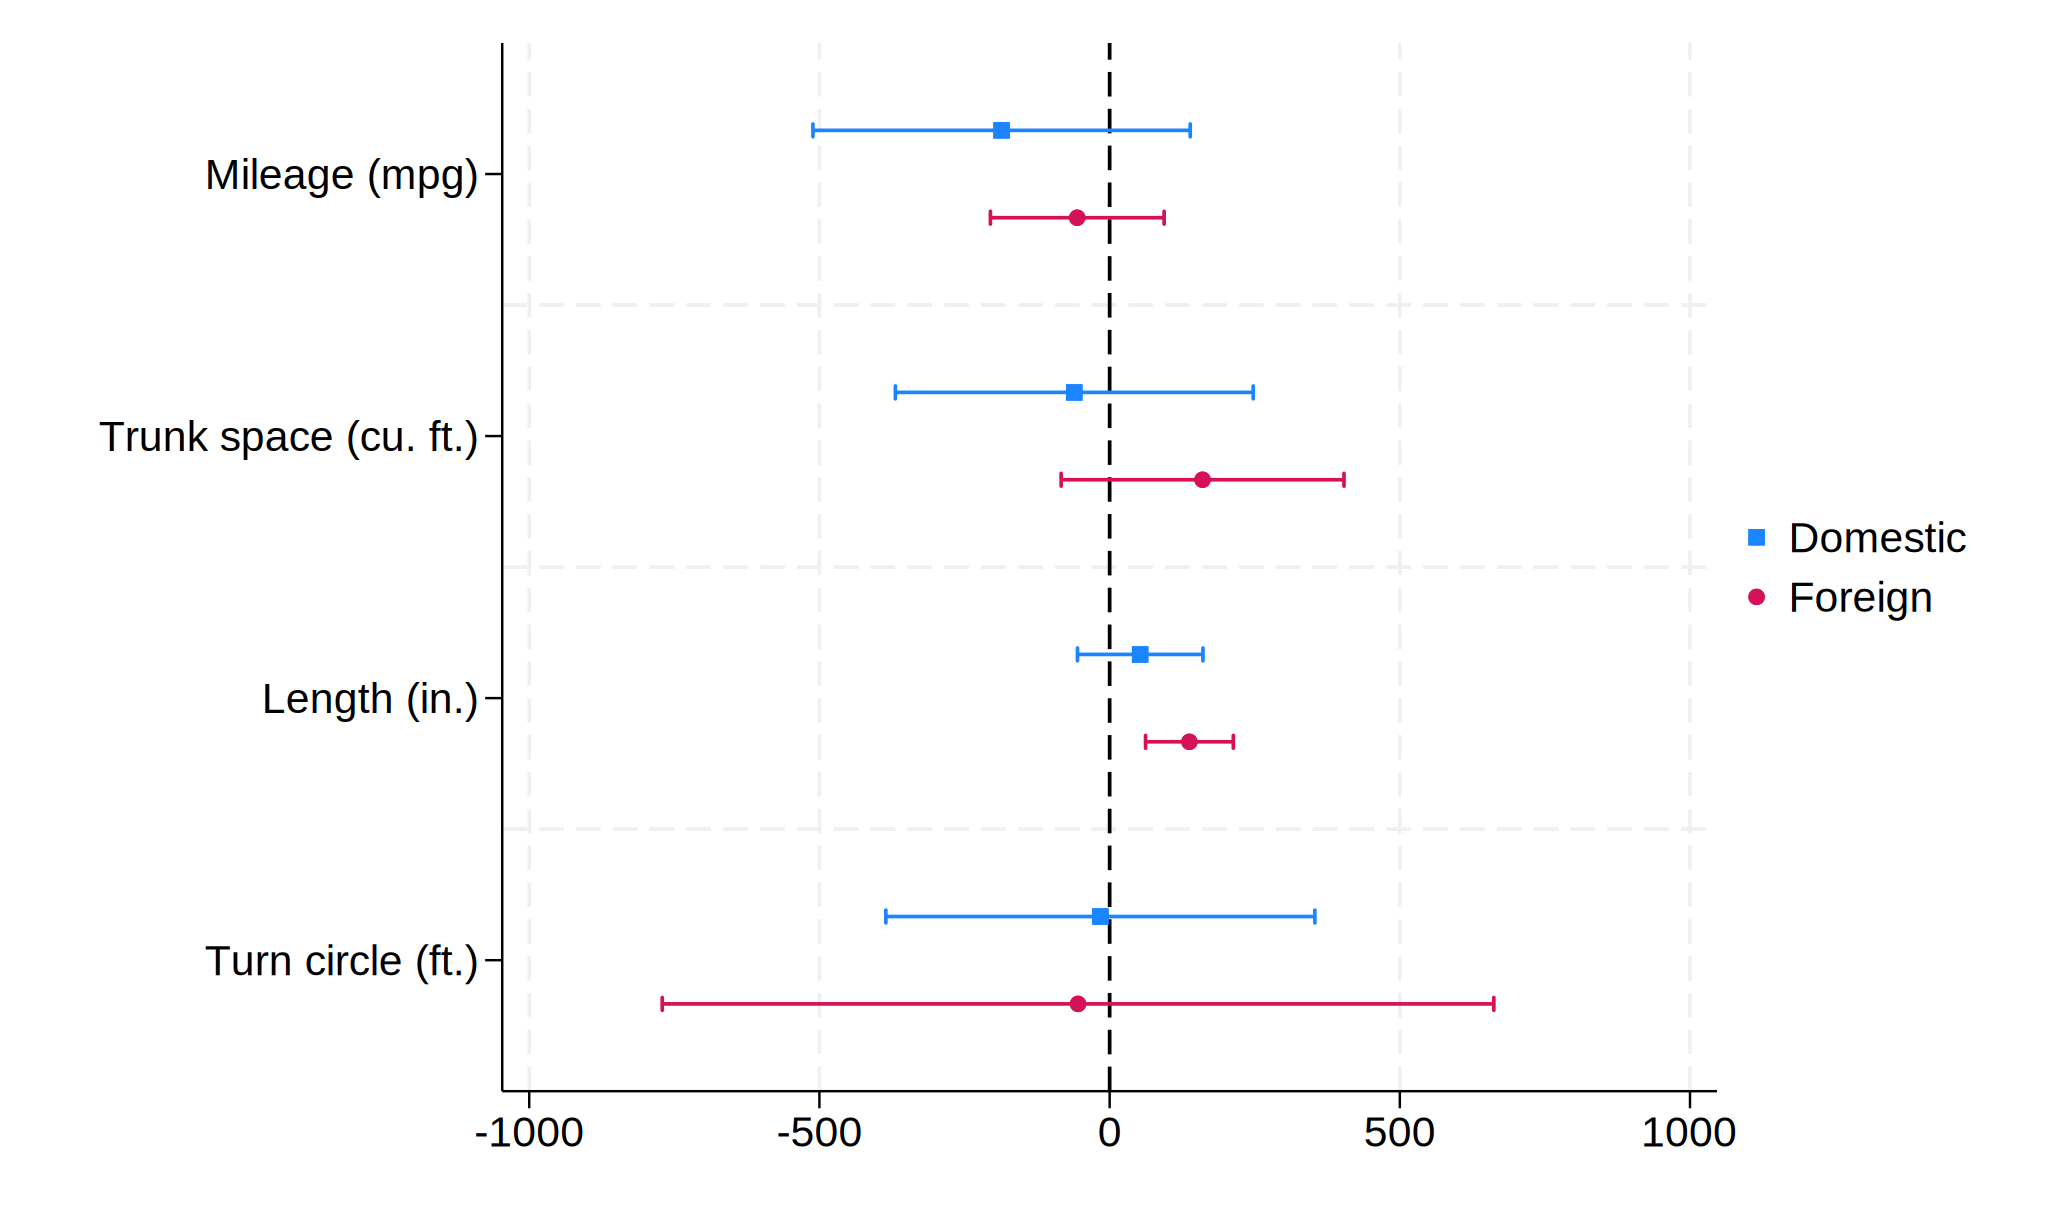

In [26]:
%%stata
coefplot (D, label("Domestic") msymbol(S)) ///
(F, label("Foreign") msymbol(C)), ///
drop(_cons) xline(0) ciopts(recast(rcap)) 


. coefplot (D, label("Domestic") msymbol(S)) ///
> (F, label("Foreign") msymbol(C)), ///
> drop(_cons) xline(0) ciopts(recast(rcap)) nooffsets
(note:  named style C not found in class symbol, default attributes used)

. 


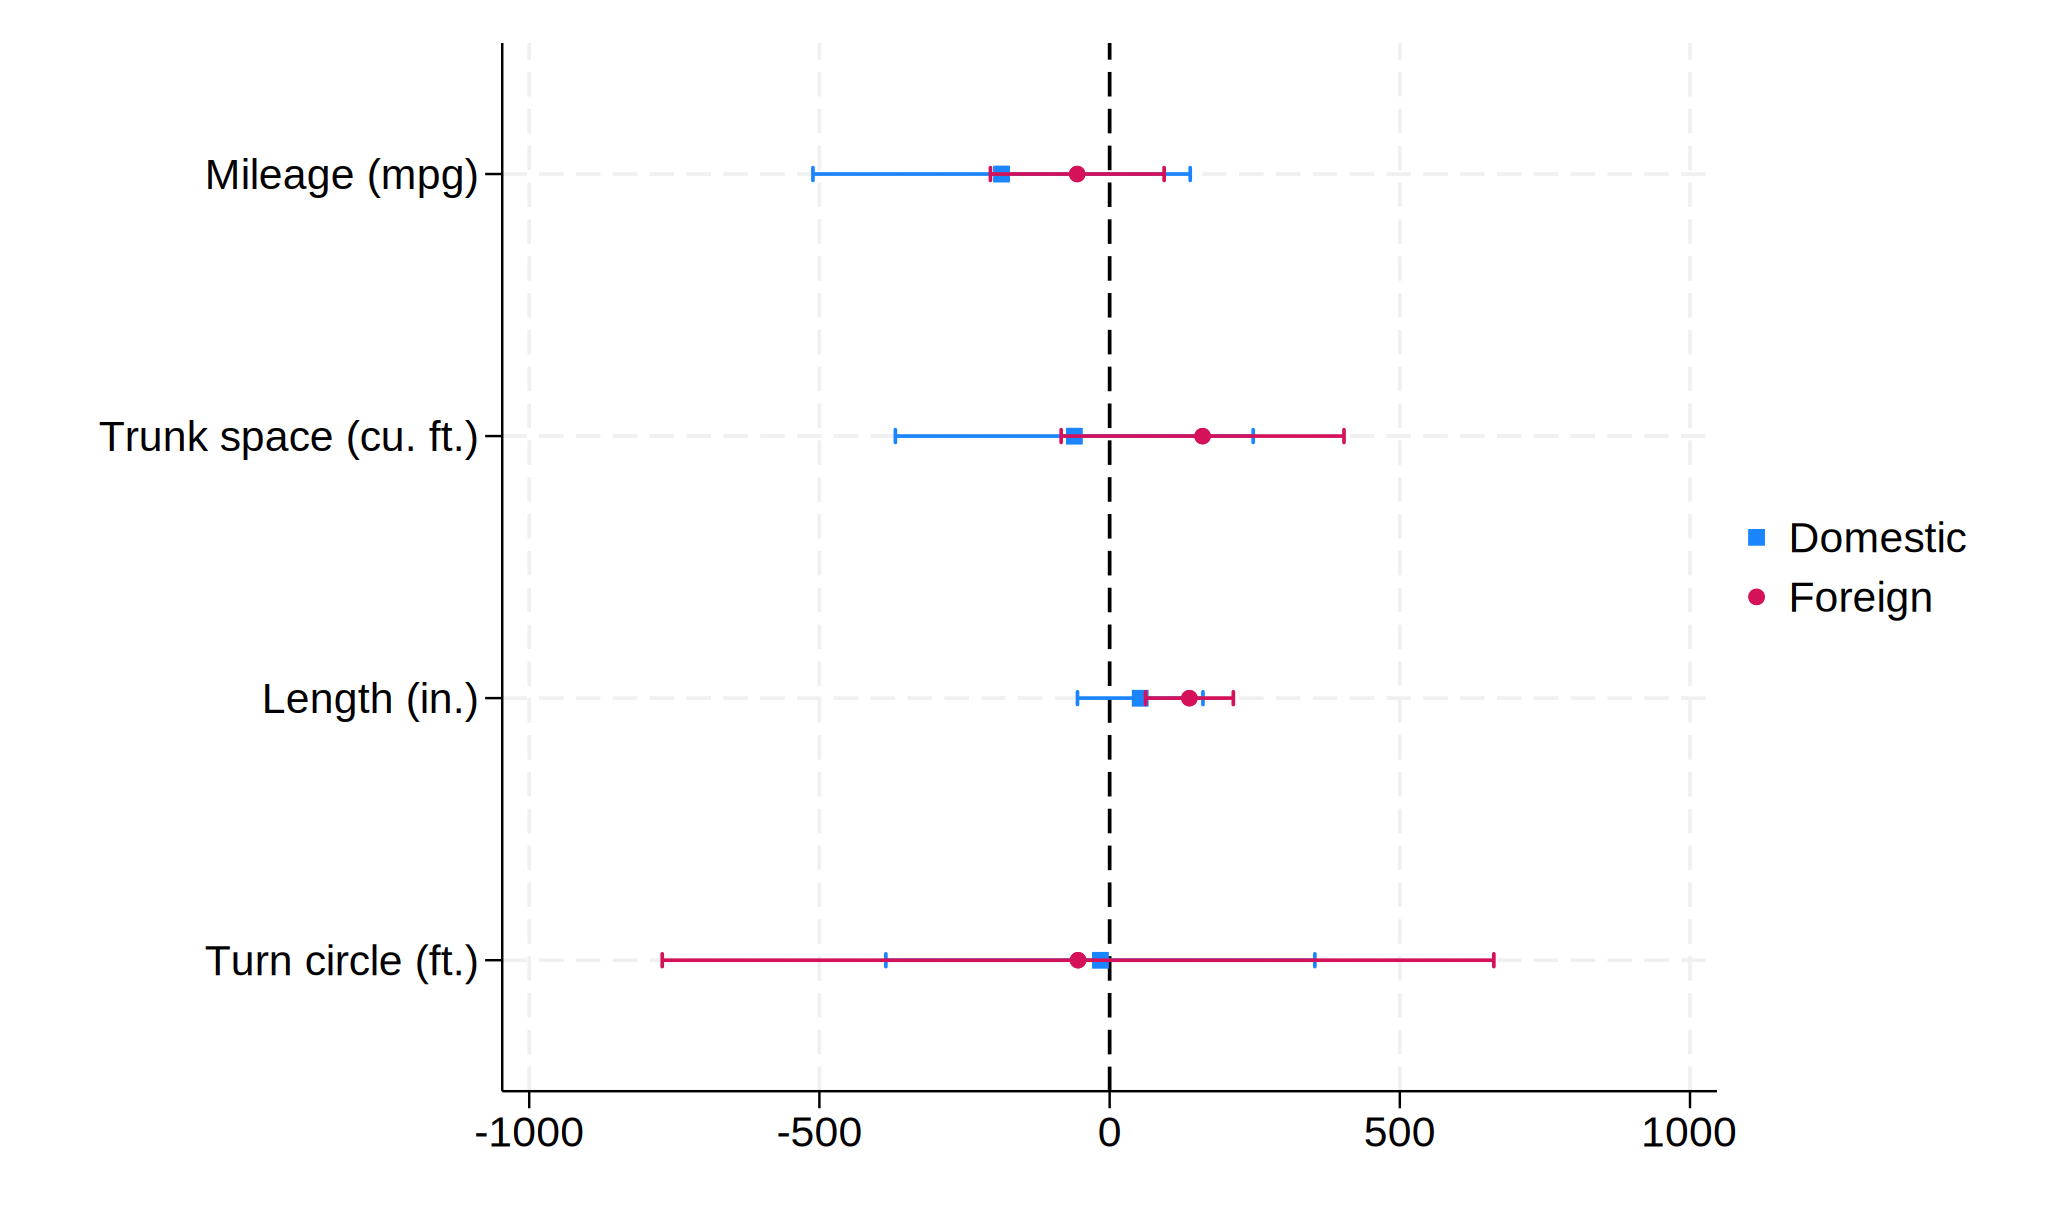

In [27]:
%%stata
coefplot (D, label("Domestic") msymbol(S)) ///
(F, label("Foreign") msymbol(C)), ///
drop(_cons) xline(0) ciopts(recast(rcap)) nooffsets


. coefplot (D, label("Domestic") msymbol(S) offset(0.1)) ///
> (F, label("Foreign") msymbol(C) offset(-0.1)), ///
> drop(_cons) xline(0) ciopts(recast(rcap)) offset
(note:  named style C not found in class symbol, default attributes used)

. 


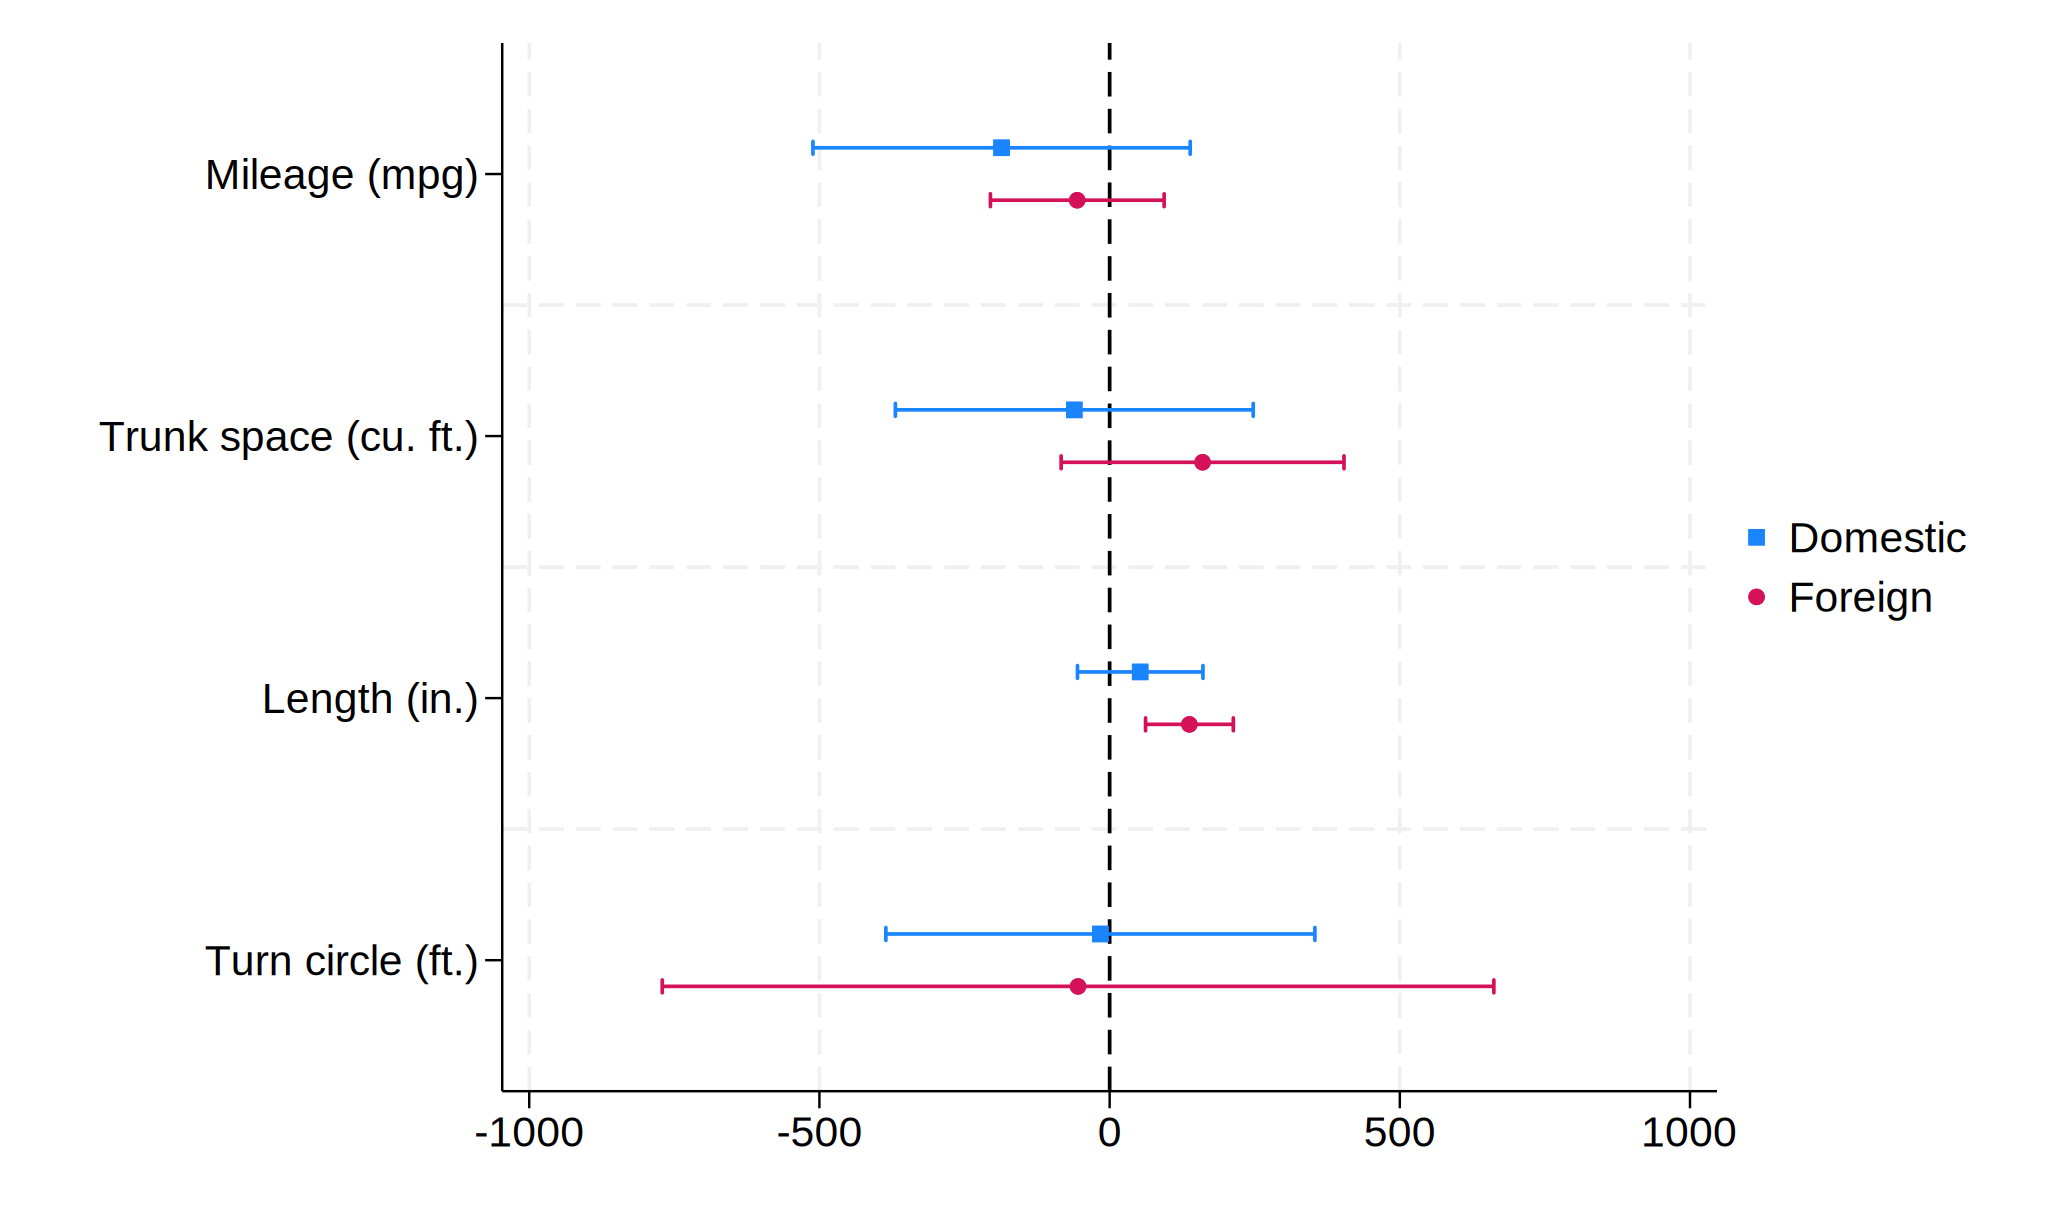

In [28]:
%%stata
coefplot (D, label("Domestic") msymbol(S) offset(0.1)) ///
(F, label("Foreign") msymbol(C) offset(-0.1)), ///
drop(_cons) xline(0) ciopts(recast(rcap)) offset